In [1]:
"Logan.barre@gmail.com"
""" https://www.unb.ca/cic/datasets/dns-exf-2021.html"""
"""The description :
We are releasing CIC-Bell-DNS-EXF-2021, a large dataset of 270.8 MB DNS traffic generated by exfiltrating various file types ranging from small to large sizes.
We leverage our developed feature extractor to extract 30 features from the DNS packets, resulting in a final structured dataset of 323,698 heavy attack samples,
53,978 light attack samples, and 641,642 distinct benign samples.
The experimental analysis of utilizing several Machine Learning (ML) algorithms on our dataset shows the effectiveness of our hybrid detection system even in the existence of light DNS traffic."""

""" We used this link too directly have the aggregated data rather than need to aggregated all the many CSV files"""
"""https://www.kaggle.com/code/dhoogla/cic-bell-dnsexf2021-00-aggregation/notebook"""
"""
Step 2 :
1. Descriptive analysis of your data.
2. Implementation of the necessary pre-processing.
3. Formalisation of the problem.
4. Selection of a baseline model and implementation of the model.

"""
# As we didn't know about the individual part, everything till the part 4 is done by Me (Logan barré) the commantary and code,
#then the other group memember to not do all everything again in 1h are going only to add their own commentary

'\nStep 2 :\n1. Descriptive analysis of your data.\n2. Implementation of the necessary pre-processing.\n3. Formalisation of the problem.\n4. Selection of a baseline model and implementation of the model.\n\n'

In [2]:
# 1 Description of the data
# The following code will only execute
# successfully when compression is complete

# So complicated to directly import with csv k
"""
https://drive.google.com/file/d/1dTmkbkiG60liBK1WS61SOk8p63nPtd9A/view?usp=drive_link benign
https://drive.google.com/file/d/1xxj7U0k90LrU8jv7gE-YHQQwa9i7Bn10/view?usp=drive_link Heavy
https://drive.google.com/file/d/1xqiYHzENrfa3hcVDcp7WCzTpe6ioXCA5/view?usp=drive_link Light
"""

# We need to describe what each columns mean to explain if we keep them or not

'\nhttps://drive.google.com/file/d/1dTmkbkiG60liBK1WS61SOk8p63nPtd9A/view?usp=drive_link benign\nhttps://drive.google.com/file/d/1xxj7U0k90LrU8jv7gE-YHQQwa9i7Bn10/view?usp=drive_link Heavy\nhttps://drive.google.com/file/d/1xqiYHzENrfa3hcVDcp7WCzTpe6ioXCA5/view?usp=drive_link Light\n'

In [3]:
# To be able to fully inspect everything with head :
import pandas as pd

# Show all columns in display
pd.set_option('display.max_columns', None)

# Show all content in each column
pd.set_option('display.max_colwidth', None)

# Optionally show all rows (careful with huge datasets)




In [4]:
import pandas as pd
import gdown
import os

# File IDs from Google Drive
file_ids = {
    # "benign": "1dTmkbkiG60liBK1WS61SOk8p63nPtd9A", explained in the 3 part why we don't use benign anymore
    "heavy":  "1xxj7U0k90LrU8jv7gE-YHQQwa9i7Bn10",
    "light":  "1xqiYHzENrfa3hcVDcp7WCzTpe6ioXCA5"
}

# Download files and load directly as Parquet
dfs = {}
for name, fid in file_ids.items():
    output_path = f"{name}.parquet"
    print(f"Downloading {name}...")
    gdown.download(f"https://drive.google.com/uc?id={fid}", output_path, quiet=False)

    # Load parquet file
    dfs[name] = pd.read_parquet(output_path, engine="pyarrow")
    print(f"Loaded {name} — shape: {dfs[name].shape}")

# Assign variables
# df_benign = dfs["benign"] # explained in the 3 part why we don't use benign anymore
df_heavy  = dfs["heavy"]
df_light  = dfs["light"]

# Quick check
print("\nBenign sample preview:")
print(df_heavy.head())


Downloading...
From: https://drive.google.com/uc?id=1xxj7U0k90LrU8jv7gE-YHQQwa9i7Bn10
To: /home/azalga/Desktop/ESILV/A4S1/ML/ProjetML/heavy.parquet
100%|██████████| 11.5M/11.5M [00:00<00:00, 18.3MB/s]


Loaded heavy — shape: (433364, 44)


Downloading...
From: https://drive.google.com/uc?id=1xqiYHzENrfa3hcVDcp7WCzTpe6ioXCA5
To: /home/azalga/Desktop/ESILV/A4S1/ML/ProjetML/light.parquet
100%|██████████| 3.20M/3.20M [00:00<00:00, 3.59MB/s]


Loaded light — shape: (102774, 44)

Benign sample preview:
    rr  A_frequency  NS_frequency  CNAME_frequency  SOA_frequency  \
0  0.0          0.0           0.0              0.0            0.0   
1  0.0          0.0           0.0              0.0            0.0   
2  0.0          0.0           0.0              0.0            0.0   
3  0.0          0.0           0.0              0.0            0.0   
4  0.0          0.0           0.0              0.0            0.0   

   NULL_frequency  PTR_frequency  HINFO_frequency  MX_frequency  \
0             0.0            2.0              0.0           0.0   
1             0.0            0.0              0.0           0.0   
2             0.0            7.0              0.0           0.0   
3             0.0            1.0              0.0           0.0   
4             0.0            2.0              0.0           0.0   

   TXT_frequency  AAAA_frequency  SRV_frequency  OPT_frequency  rr_type  \
0            0.0             0.0            0.0 

In [5]:
# As we have a correct data set we can start the analysis (first we will try to see if we can fuse directyly the 3 dataset)

# print(df_benign.columns) -- explained in the 3 part why we don't use benign anymore
print(df_heavy.columns)
print(df_light.columns)

Index(['rr', 'A_frequency', 'NS_frequency', 'CNAME_frequency', 'SOA_frequency',
       'NULL_frequency', 'PTR_frequency', 'HINFO_frequency', 'MX_frequency',
       'TXT_frequency', 'AAAA_frequency', 'SRV_frequency', 'OPT_frequency',
       'rr_type', 'rr_count', 'rr_name_entropy', 'rr_name_length',
       'distinct_ns', 'distinct_ip', 'unique_country', 'unique_asn',
       'distinct_domains', 'reverse_dns', 'a_records', 'unique_ttl',
       'ttl_mean', 'ttl_variance', 'timestamp', 'FQDN_count',
       'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special',
       'labels', 'labels_max', 'labels_average', 'longest_word', 'sld', 'len',
       'subdomain', 'GlobalClass', 'SubClass'],
      dtype='object')
Index(['rr', 'A_frequency', 'NS_frequency', 'CNAME_frequency', 'SOA_frequency',
       'NULL_frequency', 'PTR_frequency', 'HINFO_frequency', 'MX_frequency',
       'TXT_frequency', 'AAAA_frequency', 'SRV_frequency', 'OPT_frequency',
       'rr_type', 'rr_count', 'rr_name_e

In [6]:
# The result is yes they have the exact same columns so we can fuse the mdirectly
df_all = pd.concat([df_heavy, df_light], ignore_index=True)
print("Shape of merged dataset:", df_all.shape)
print("Class distribution:\n", df_all['GlobalClass'].value_counts())
print("Column types:\n", df_all.dtypes)
print("First row preview:\n", df_all.iloc[[0]])

Shape of merged dataset: (536138, 44)
Class distribution:
 GlobalClass
Heavy Attack    251670
Heavy Benign    181694
Light Benign     60091
Light Attack     42683
Name: count, dtype: int64
Column types:
 rr                   float32
A_frequency          float32
NS_frequency         float32
CNAME_frequency      float32
SOA_frequency        float32
NULL_frequency       float32
PTR_frequency        float32
HINFO_frequency      float32
MX_frequency         float32
TXT_frequency        float32
AAAA_frequency       float32
SRV_frequency        float32
OPT_frequency        float32
rr_type               object
rr_count             float32
rr_name_entropy      float32
rr_name_length       float32
distinct_ns          float32
distinct_ip         category
unique_country        object
unique_asn            object
distinct_domains      object
reverse_dns           object
a_records            float32
unique_ttl            object
ttl_mean             float32
ttl_variance         float32
timestamp    

## Descriptive statistics and data info


In [7]:
display(df_all.describe())
display(df_all.info())

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,AAAA_frequency,SRV_frequency,OPT_frequency,rr_count,rr_name_entropy,rr_name_length,distinct_ns,a_records,ttl_mean,ttl_variance,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
count,175107.000000,175107.000000,175107.0,175107.0,175107.0,175107.0,175107.000000,175107.0,175107.0,175107.000000,175107.000000,175107.0,175107.0,175107.000000,175107.000000,175107.000000,175107.000000,175107.0,175107.000000,175107.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000
mean,0.841797,0.841794,0.0,0.0,0.0,0.0,2.111366,0.0,0.0,0.000023,0.000011,0.0,0.0,0.329810,2.949152,21.381418,0.212818,0.0,53.964386,1.984312,22.345262,6.100633,0.849604,10.412959,6.539344,2.485026,4.543355,4.806201,8.240375,4.794970,12.587228,0.757902
std,1.297292,1.297289,0.0,0.0,0.0,0.0,2.513660,0.0,0.0,0.004779,0.004779,0.0,0.0,0.661498,0.367208,6.417082,0.416343,0.0,66.439445,4.425665,5.968281,3.883699,4.951571,3.226364,4.482443,0.407780,2.193396,1.796751,4.408849,4.579084,4.173231,0.428354
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.693120,2.000000,0.000000,0.0,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,1.500000,2.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.693240,15.000000,0.000000,0.0,1.000000,0.000000,19.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000
50%,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,3.102731,24.000000,0.000000,0.0,1.000000,0.000000,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000
75%,2.000000,2.000000,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,3.222243,27.000000,0.000000,0.0,125.000000,0.000000,27.000000,10.000000,0.000000,10.000000,11.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000
max,12.000000,12.000000,0.0,0.0,0.0,0.0,18.000000,0.0,0.0,1.000000,2.000000,0.0,0.0,5.000000,3.570534,36.000000,3.000000,0.0,255.000000,1003.102051,36.000000,29.000000,32.000000,34.000000,12.000000,4.368167,8.000000,7.000000,32.000000,32.000000,35.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   rr                175107 non-null  float32 
 1   A_frequency       175107 non-null  float32 
 2   NS_frequency      175107 non-null  float32 
 3   CNAME_frequency   175107 non-null  float32 
 4   SOA_frequency     175107 non-null  float32 
 5   NULL_frequency    175107 non-null  float32 
 6   PTR_frequency     175107 non-null  float32 
 7   HINFO_frequency   175107 non-null  float32 
 8   MX_frequency      175107 non-null  float32 
 9   TXT_frequency     175107 non-null  float32 
 10  AAAA_frequency    175107 non-null  float32 
 11  SRV_frequency     175107 non-null  float32 
 12  OPT_frequency     175107 non-null  float32 
 13  rr_type           175107 non-null  object  
 14  rr_count          175107 non-null  float32 
 15  rr_name_entropy   175107 non-null  float32 
 16  rr

None

We can see directly the too part between the statefull and stateless rows, one part is around 262105 lines and the other 757211 non null rows 

In [8]:
categorical_columns = [
    'GlobalClass', 'SubClass', 'rr_type', 'distinct_ip', 'unique_country',
    'unique_asn', 'distinct_domains', 'reverse_dns', 'unique_ttl',
    'longest_word', 'sld'
]

for col in categorical_columns:
    print(f"--- Column: {col} ---")
    unique_count = df_all[col].nunique()
    print(f"Number of unique values: {unique_count}")

    if unique_count > 20:
        print(f"Column '{col}' has a large number of unique values. Showing top 5 most frequent:")
        print(df_all[col].value_counts().head(5))
    else:
        print("Value counts:")
        print(df_all[col].value_counts())
    print("\n")

--- Column: GlobalClass ---
Number of unique values: 4
Value counts:
GlobalClass
Heavy Attack    251670
Heavy Benign    181694
Light Benign     60091
Light Attack     42683
Name: count, dtype: int64


--- Column: SubClass ---
Number of unique values: 14
Value counts:
SubClass
Heavy Benign 3             181694
Heavy Attack text           71102
Light Benign -              60091
Heavy Attack video          38012
Heavy Attack image          36386
Heavy Attack audio          35795
Heavy Attack compressed     35746
Heavy Attack exe            34629
Light Attack audio          17618
Light Attack compressed     10241
Light Attack exe             6450
Light Attack video           4371
Light Attack text            3479
Light Attack image            524
Name: count, dtype: int64


--- Column: rr_type ---
Number of unique values: 6
Value counts:
rr_type
{'PTR'}          103337
{'A'}             65982
{None}             3662
set()              2121
{'TXT'}               4
{'AAAA', 'A'}         1
Na

## Visualize data distributions

We create visualizations (e.g., histograms, box plots) for numerical features to understand their distributions and identify potential outliers.


Visualizing column: A_frequency


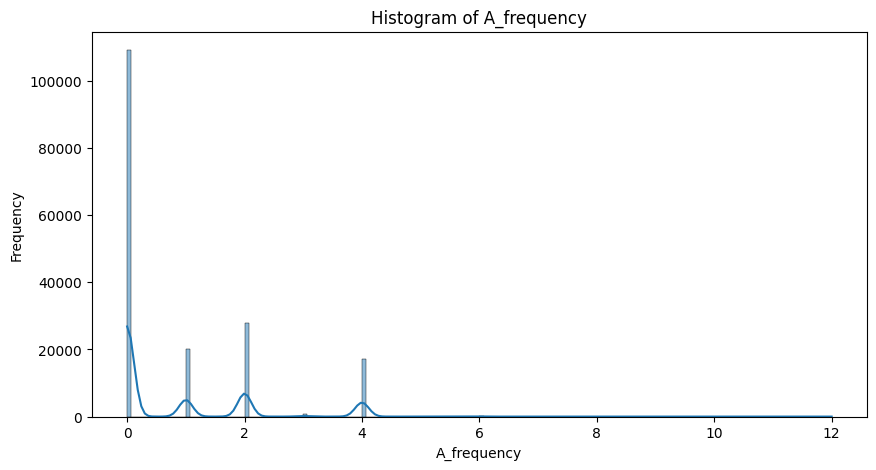

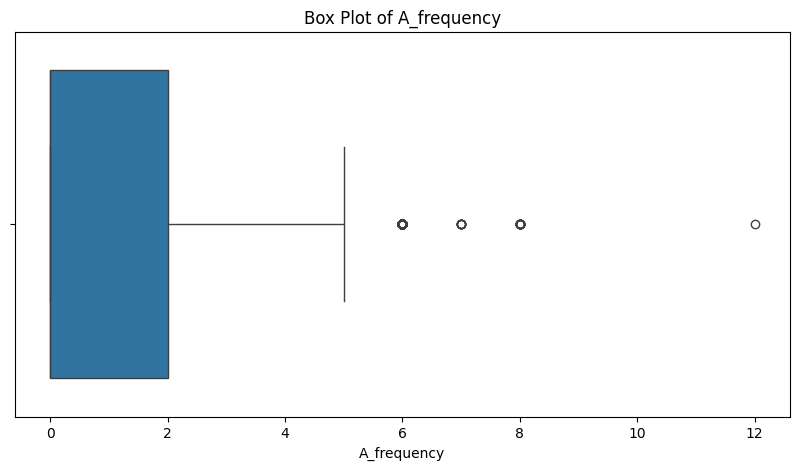

Visualizing column: NS_frequency


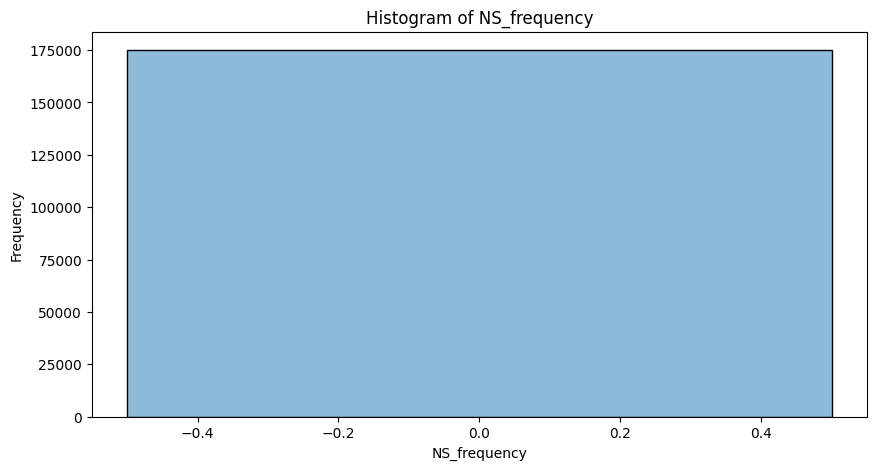

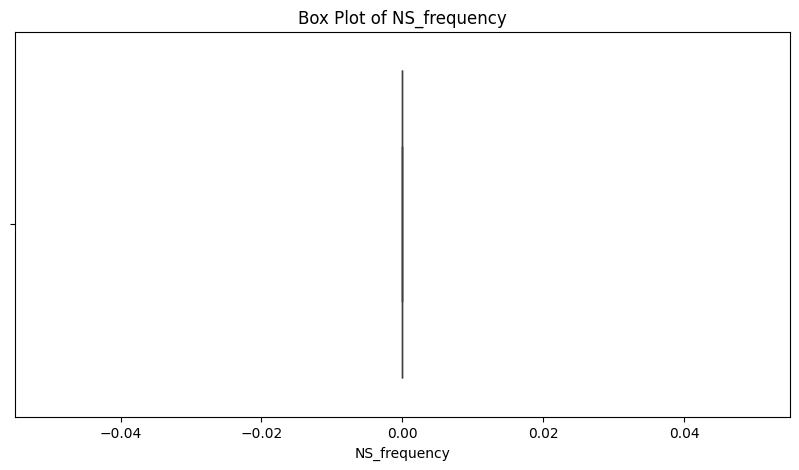

Visualizing column: CNAME_frequency


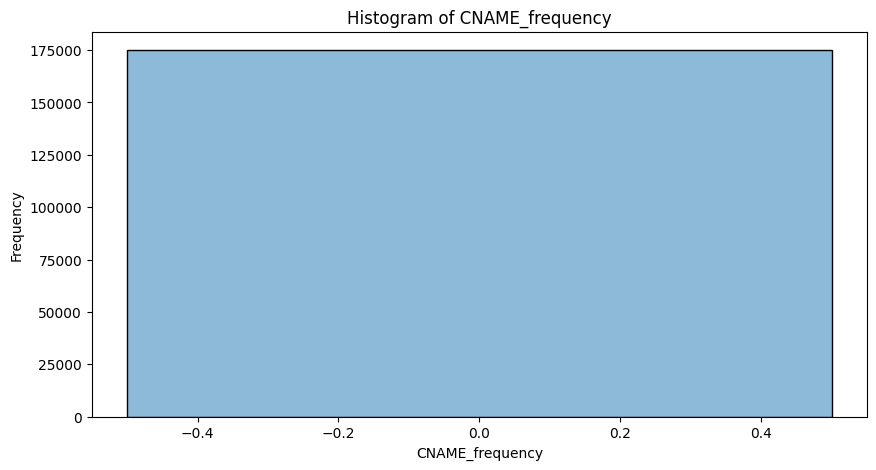

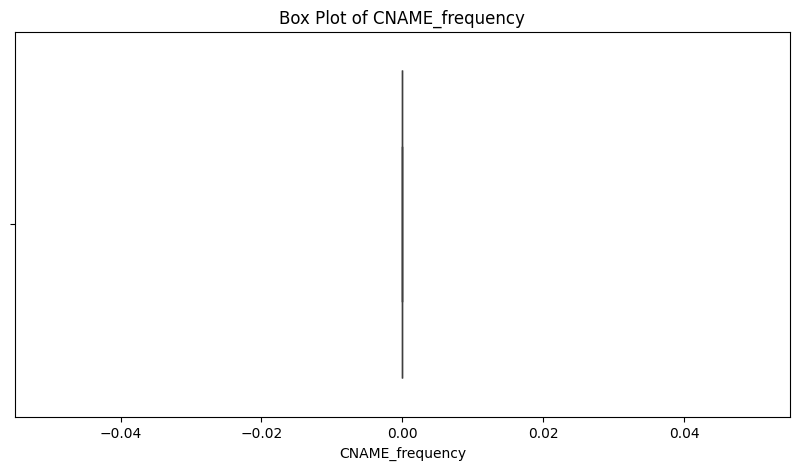

Visualizing column: SOA_frequency


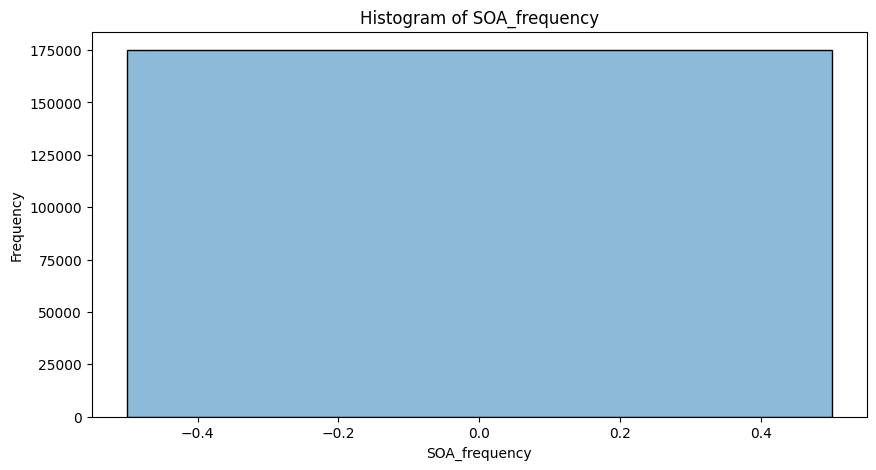

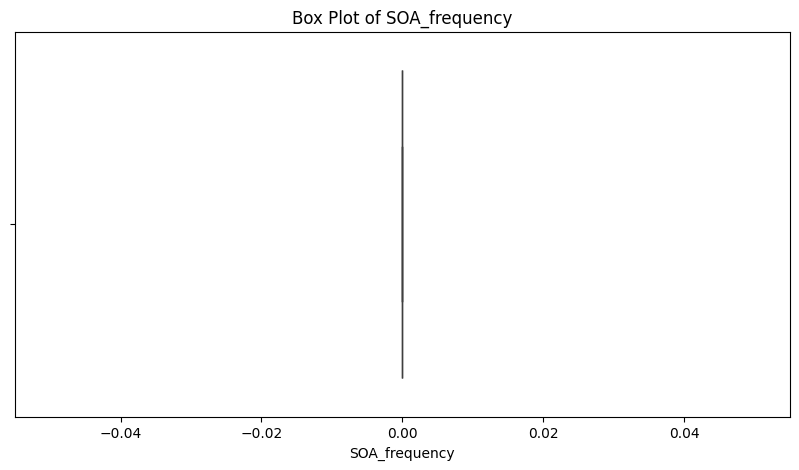

Visualizing column: NULL_frequency


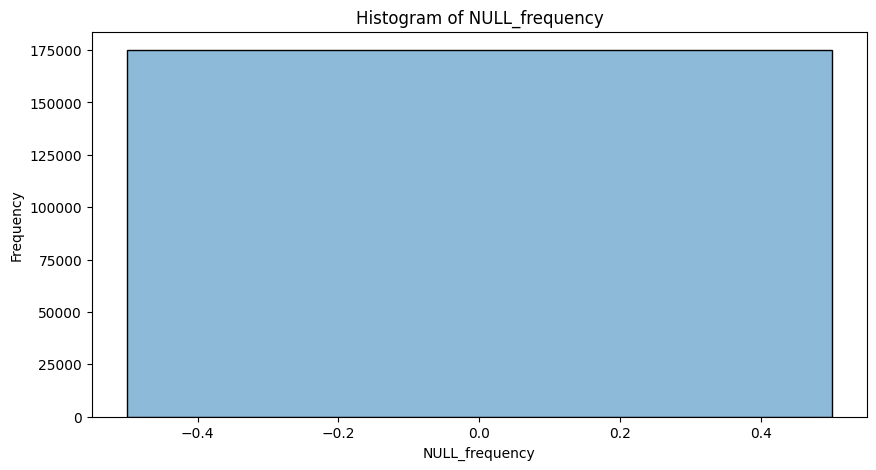

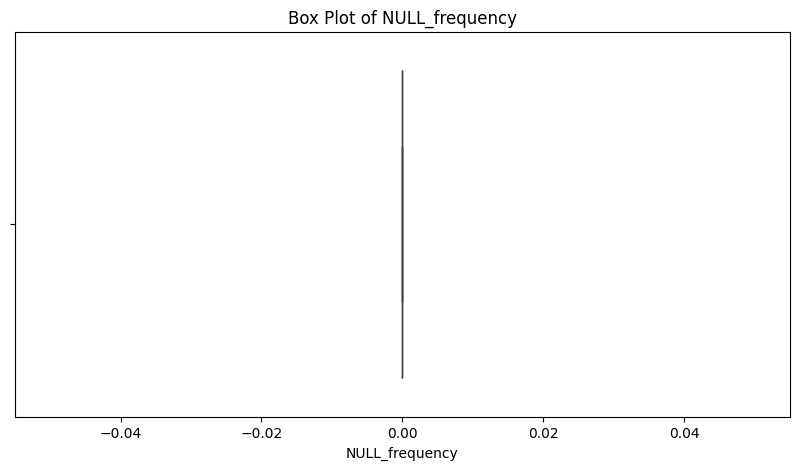

Visualizing column: PTR_frequency


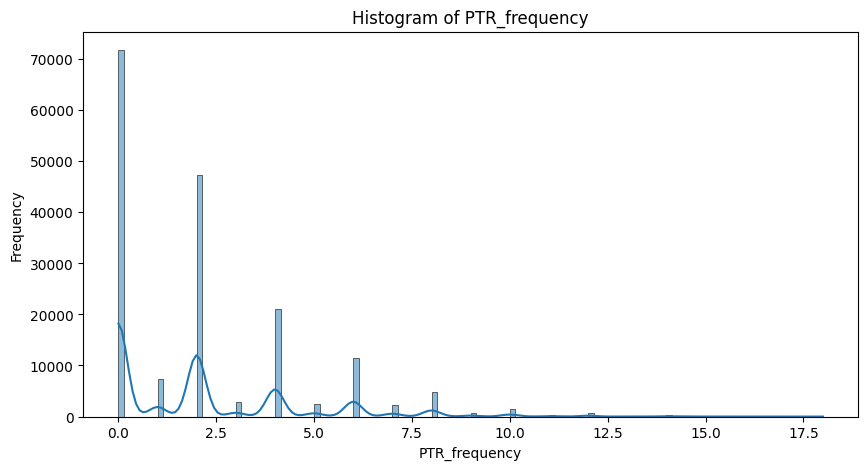

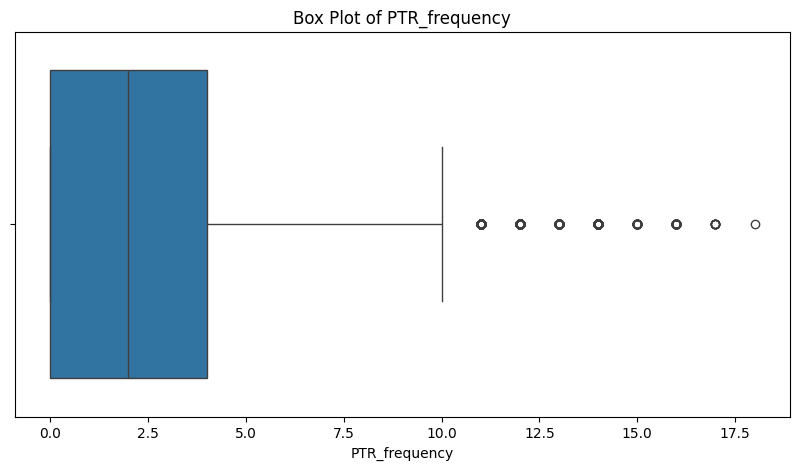

Visualizing column: HINFO_frequency


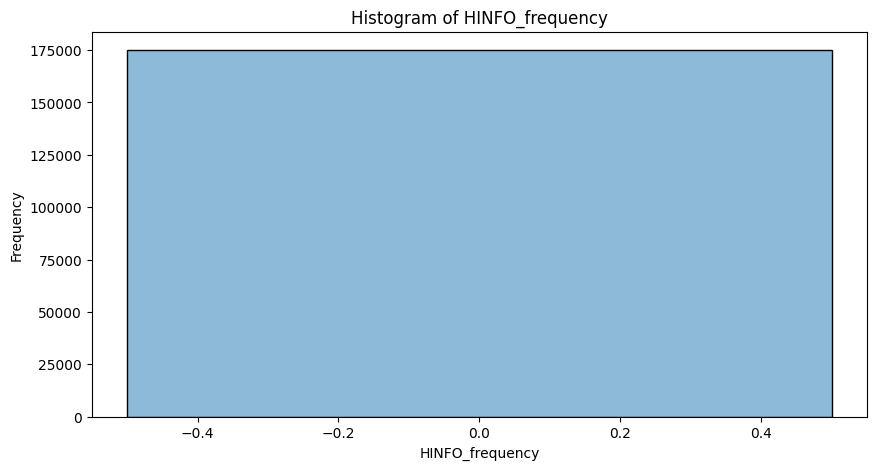

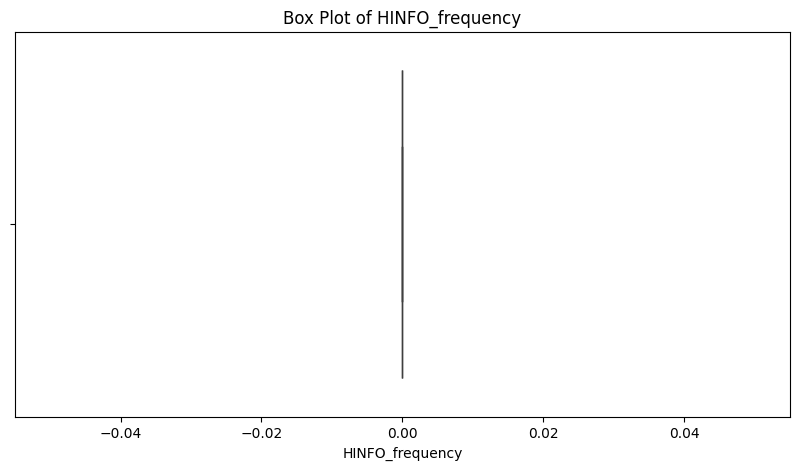

Visualizing column: MX_frequency


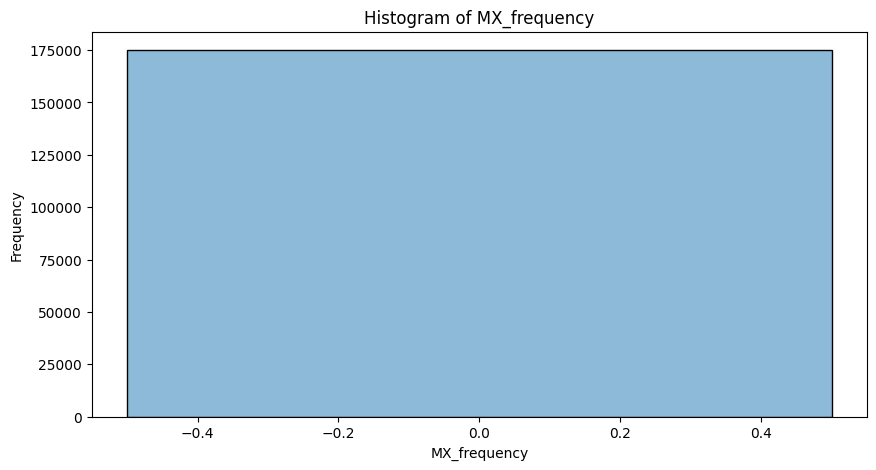

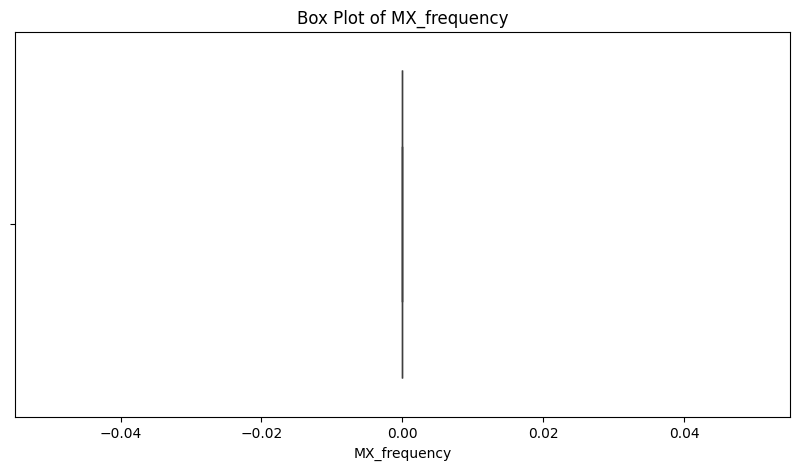

Visualizing column: TXT_frequency


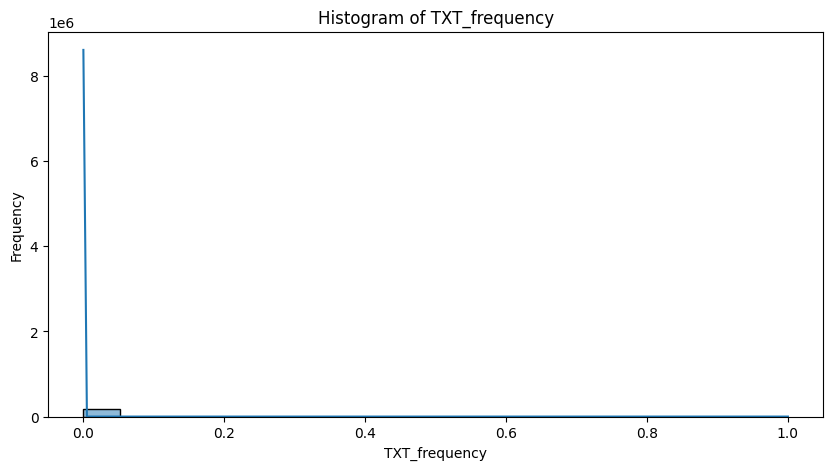

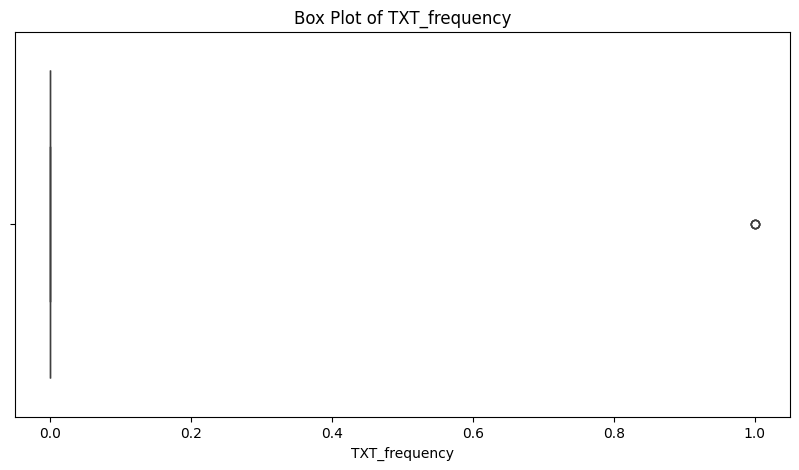

Visualizing column: AAAA_frequency


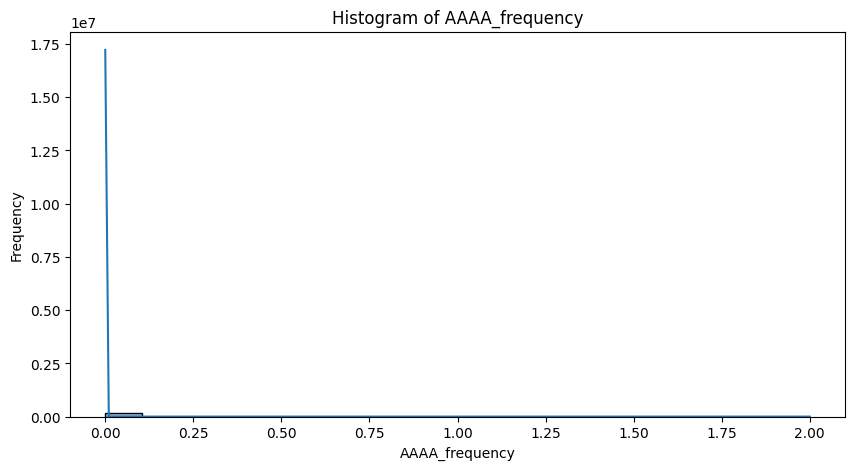

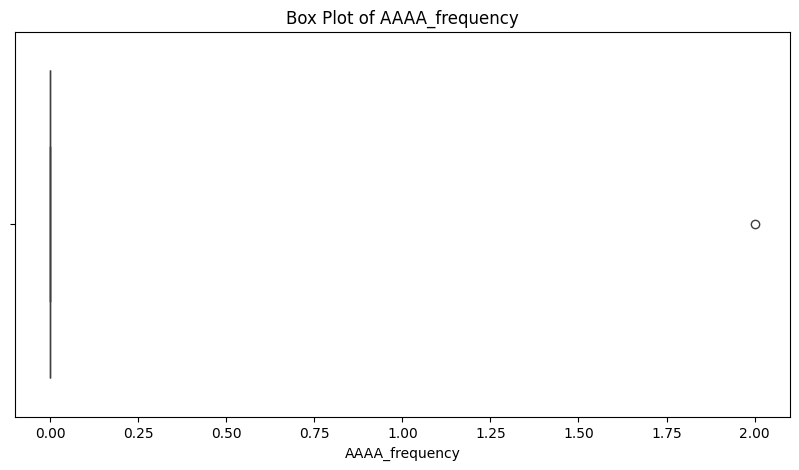

Visualizing column: SRV_frequency


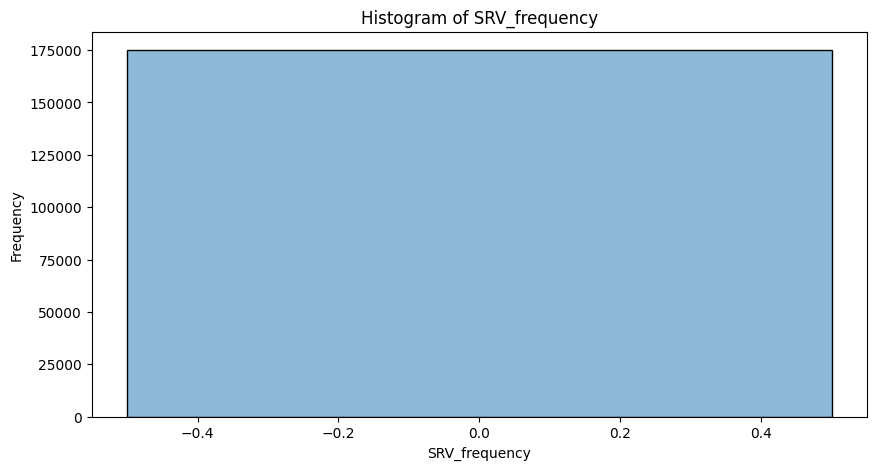

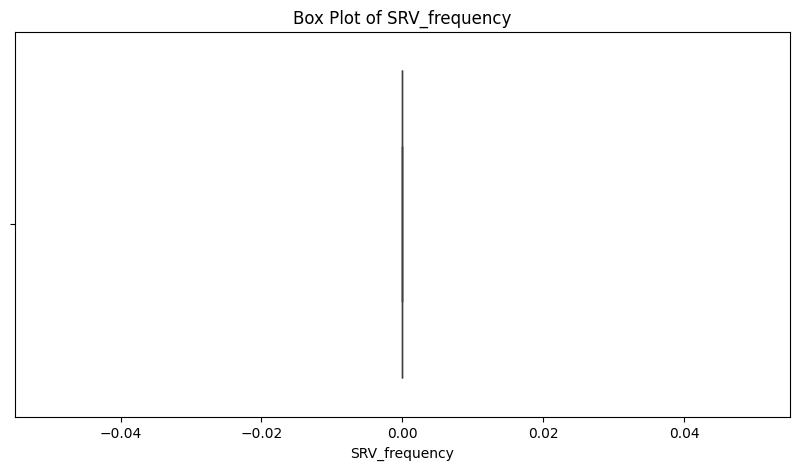

Visualizing column: OPT_frequency


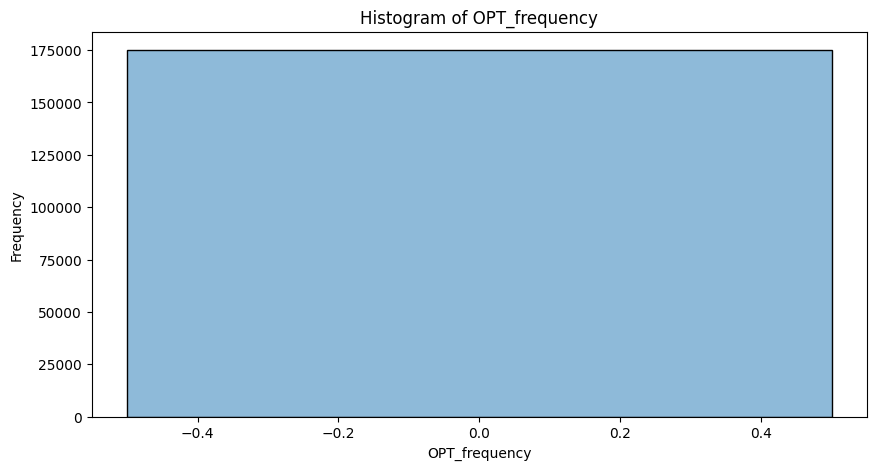

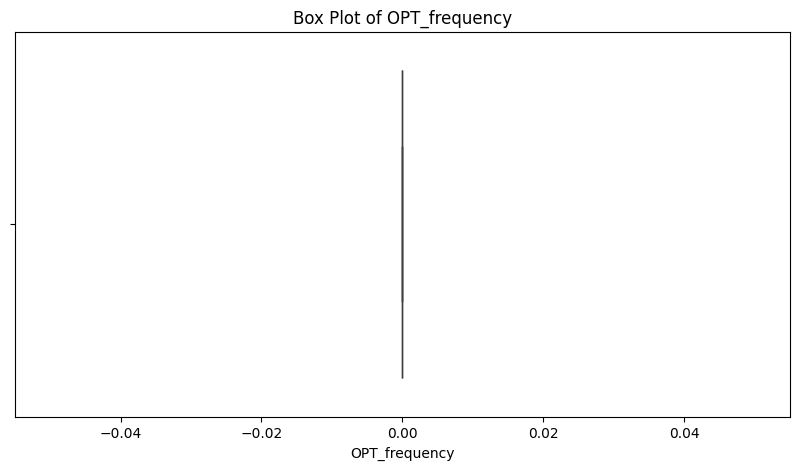

Visualizing column: rr_name_entropy


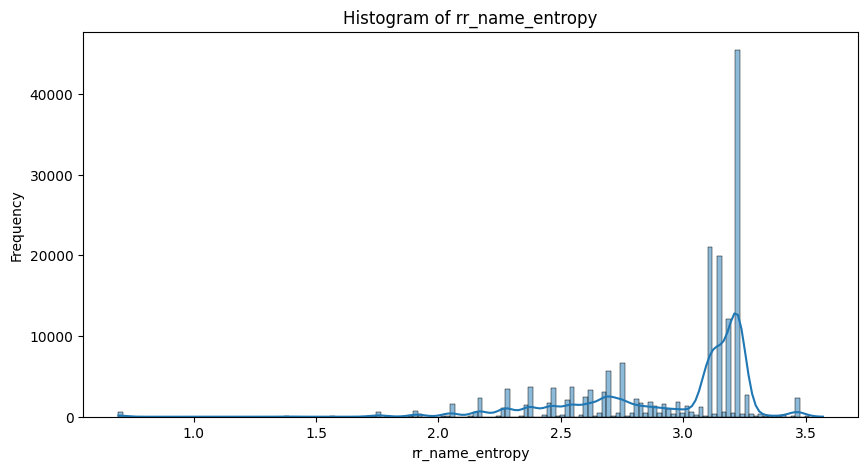

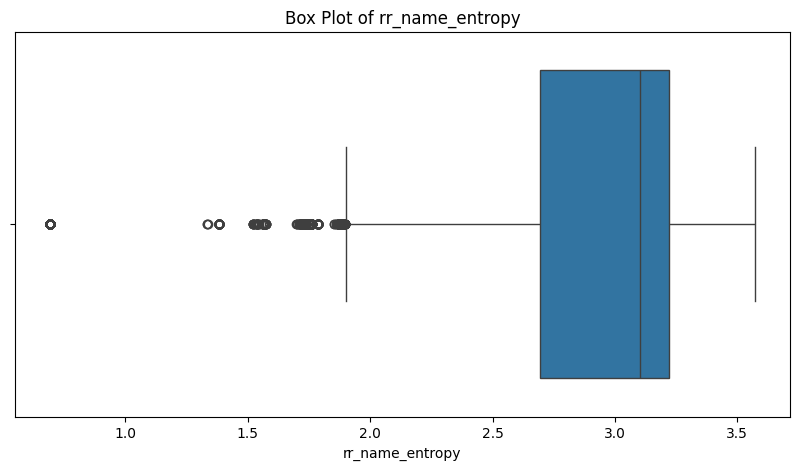

Visualizing column: rr_name_length


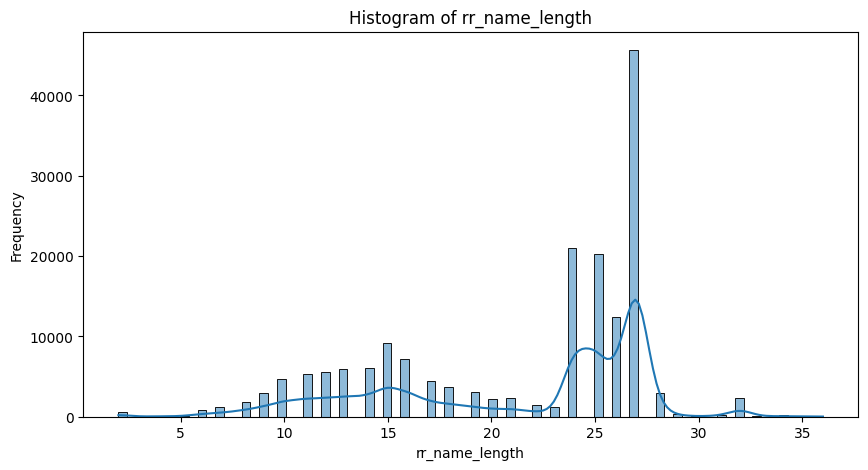

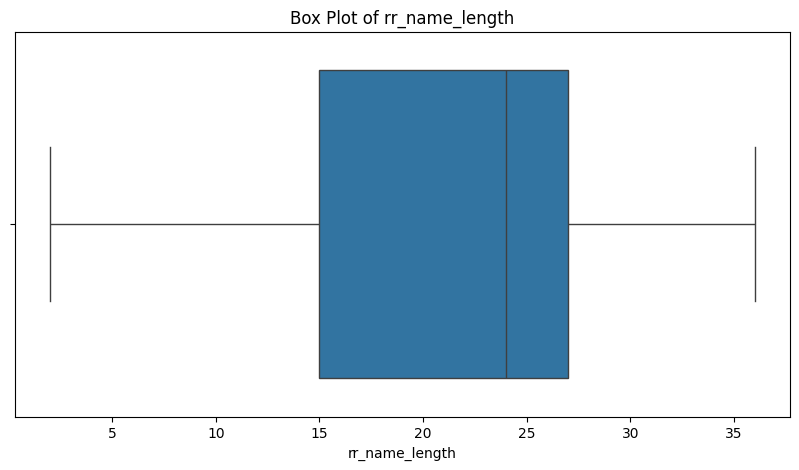

Visualizing column: distinct_ns


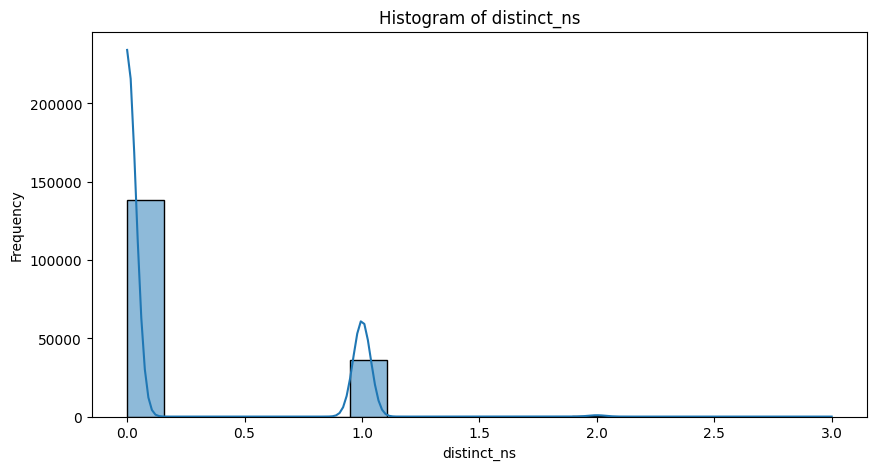

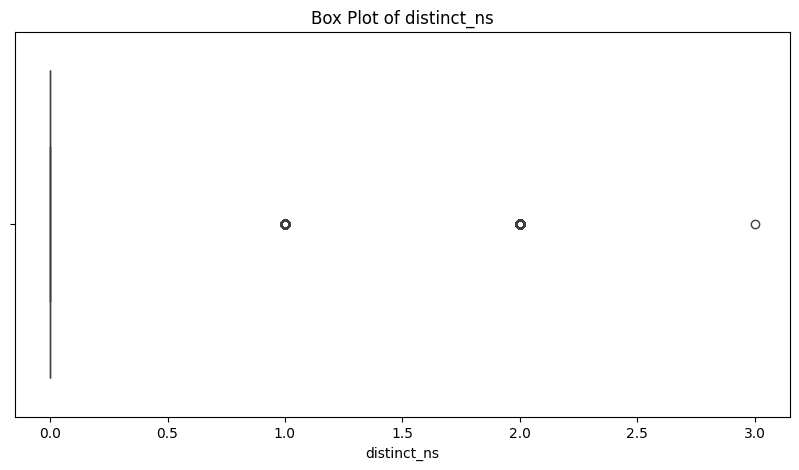

Visualizing column: ttl_mean


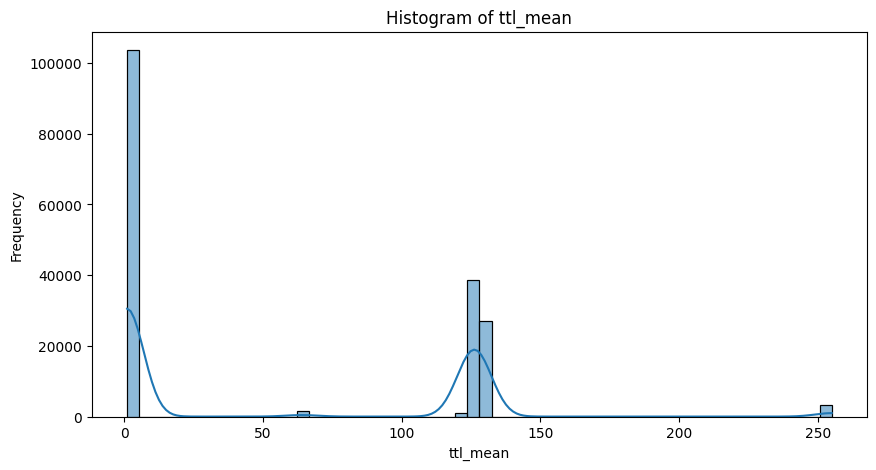

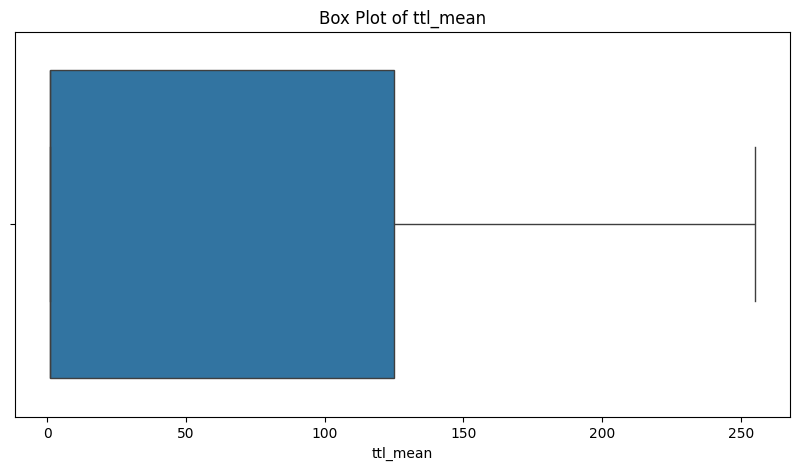

Visualizing column: ttl_variance


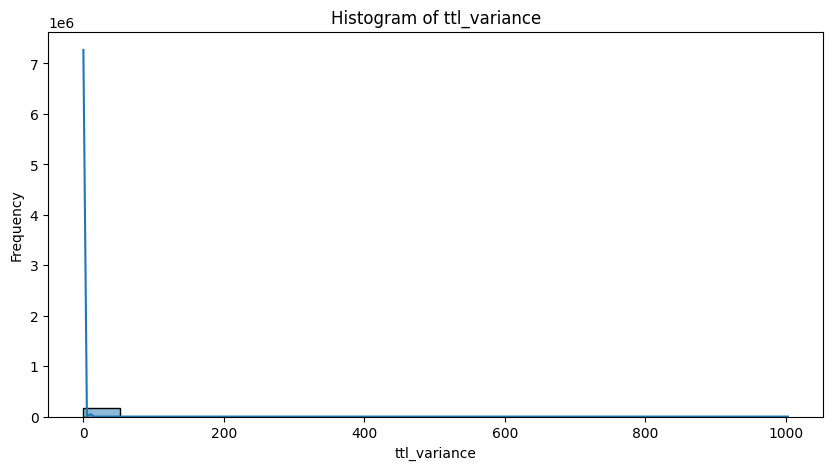

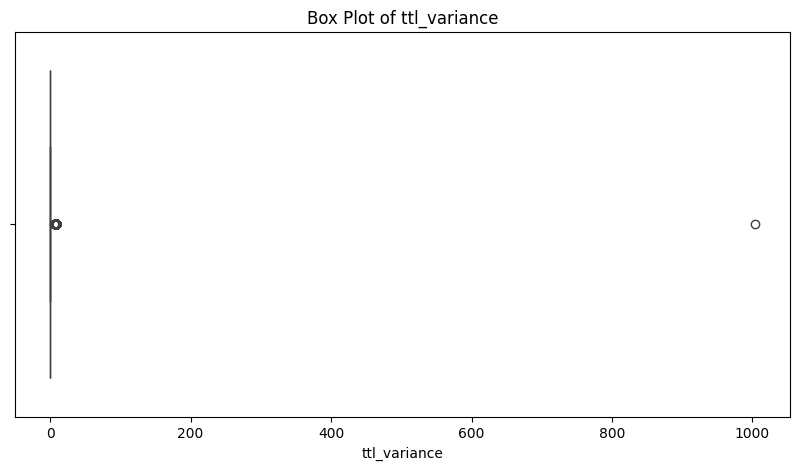

Visualizing column: entropy


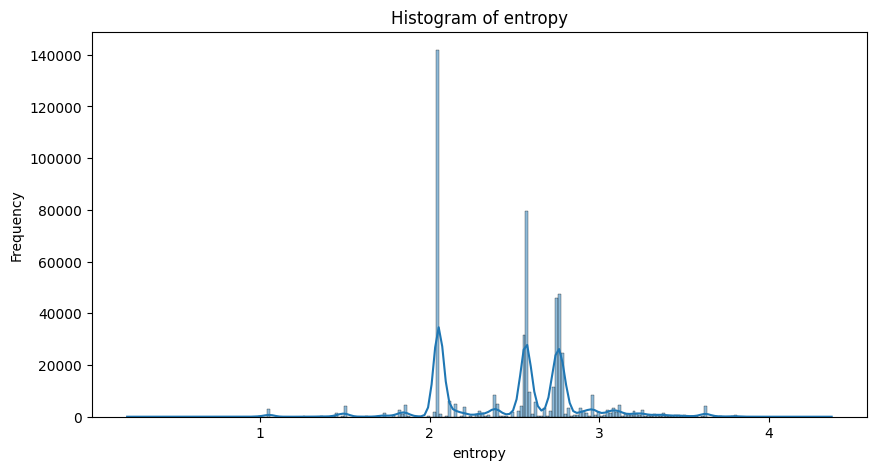

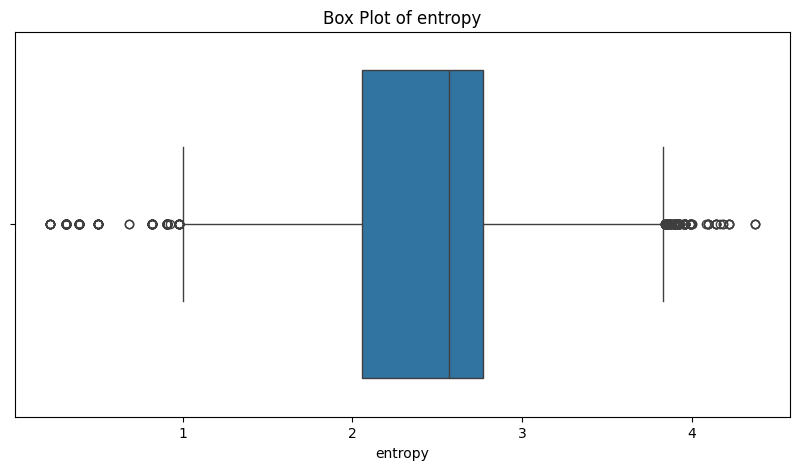

Visualizing column: labels_average


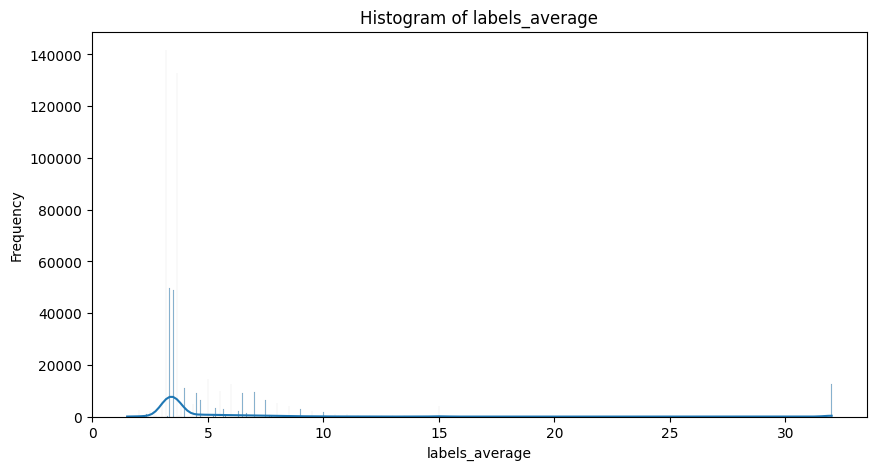

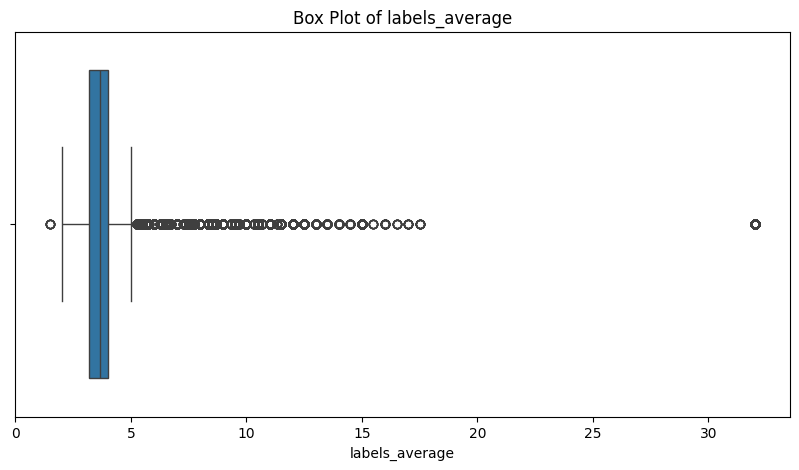

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df_all.select_dtypes(include=['float32', 'int8']).columns

# Exclude 'FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'labels_max', 'len', 'subdomain' as they are int8 and represent counts/lengths, not typical numerical distributions
# Also exclude 'rr', 'rr_count', 'a_records' as they have many missing values as seen in describe()
columns_to_plot = [col for col in numerical_columns if col not in ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'labels_max', 'len', 'subdomain', 'rr', 'rr_count', 'a_records']]

for col in columns_to_plot:
    print(f"Visualizing column: {col}")

    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(df_all[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_all[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

## Analyze relationships

We explore relationships between features and the target variable (`GlobalClass`) using visualizations and statistical methods (e.g., correlation matrix for numerical features).



We are going to
Create a correlation matrix for the numerical features, visualize it with a heatmap, and then create visualizations to explore the relationship between selected features and the target variable 'GlobalClass'.



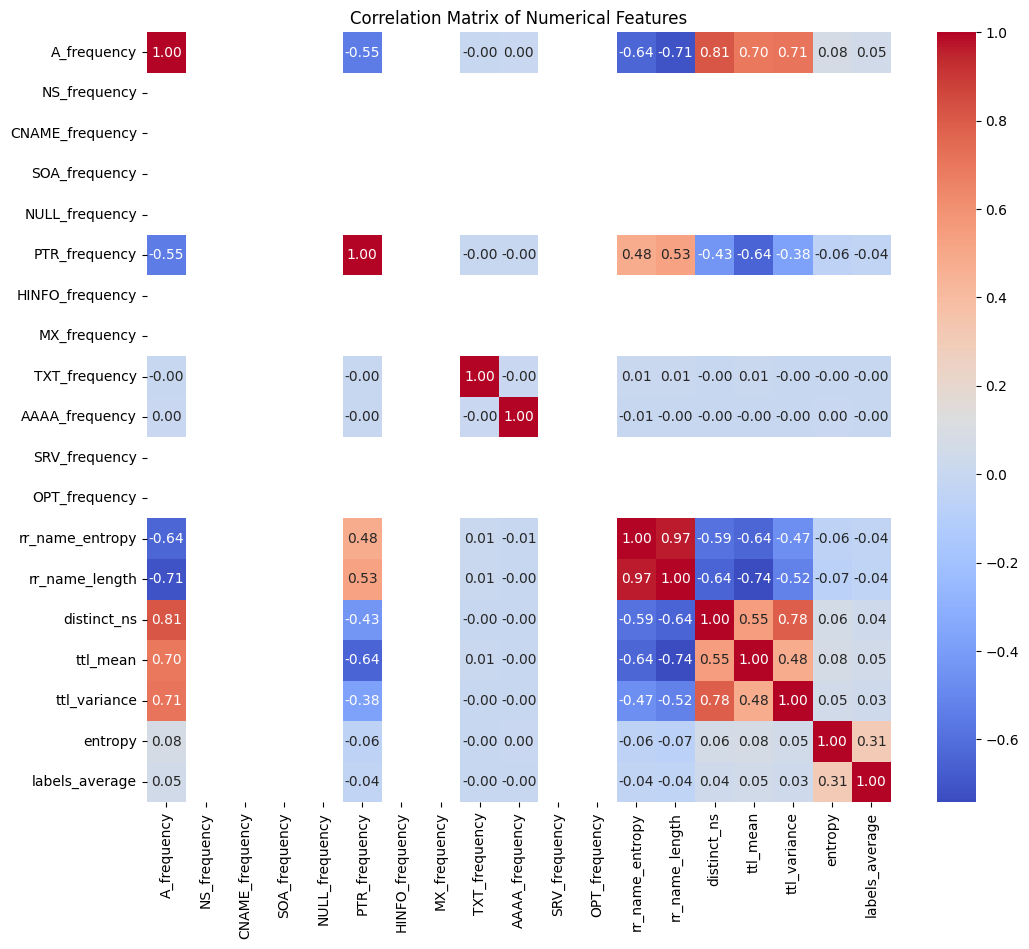

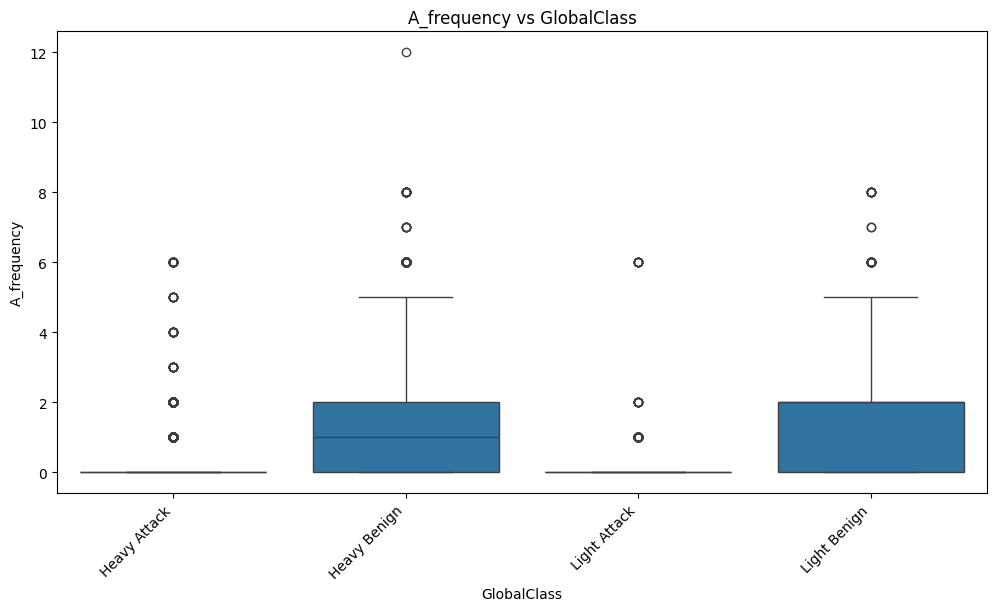

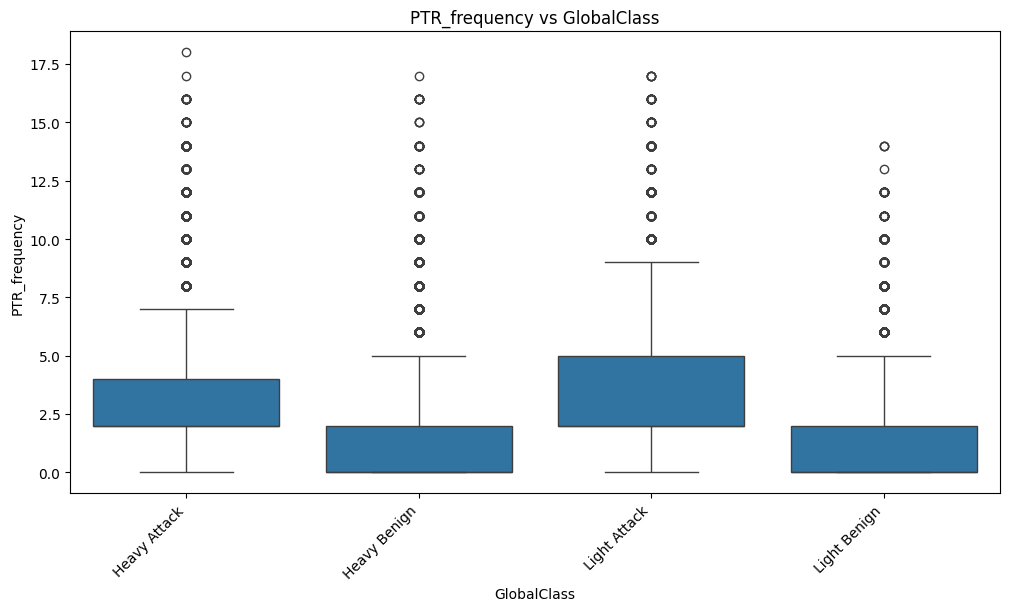

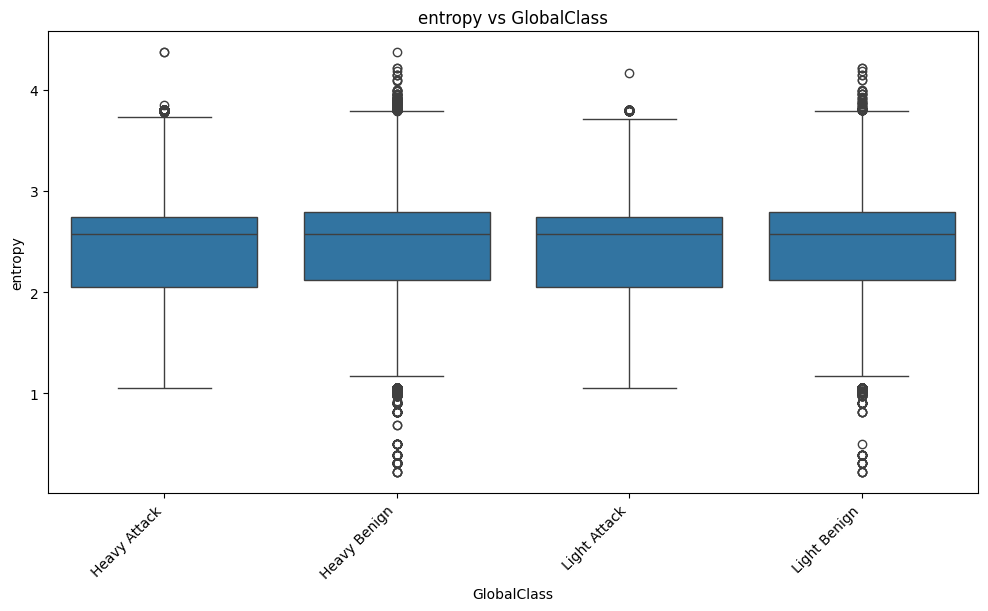

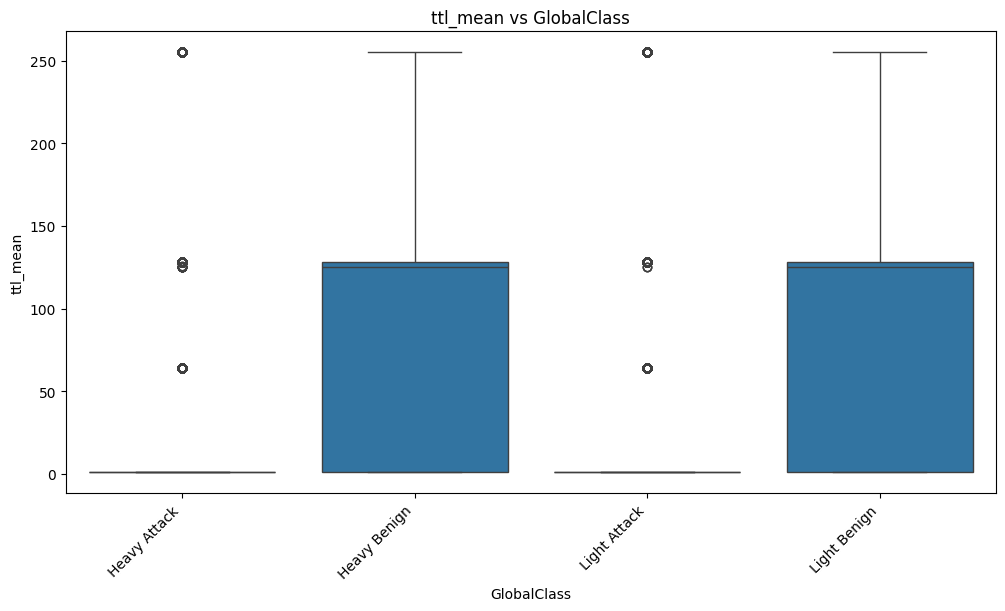

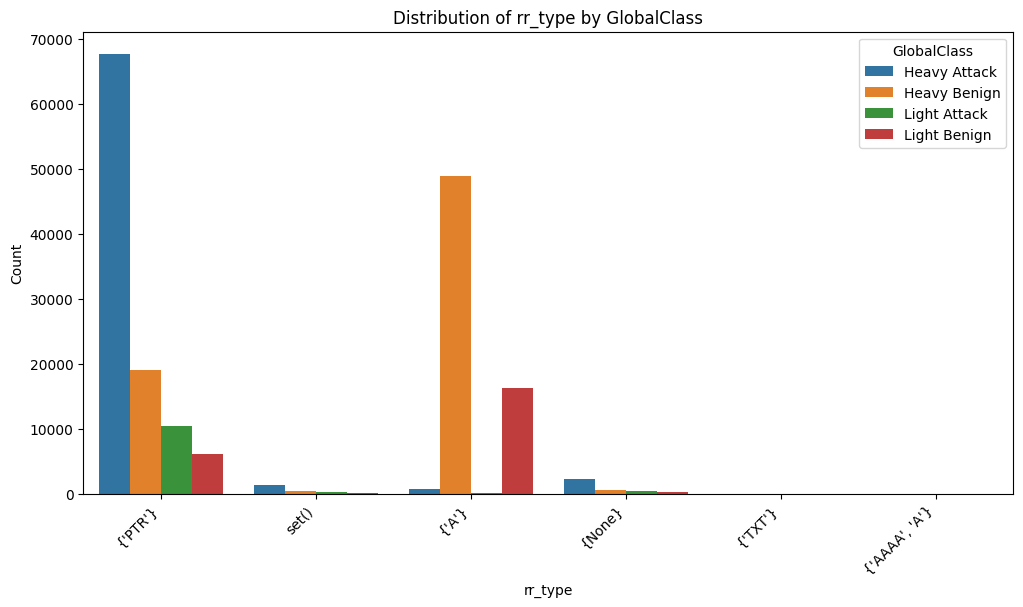

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns, excluding those with many missing values or that are counts/lengths
numerical_cols_for_corr = df_all.select_dtypes(include=['float32', 'int8']).columns
exclude_cols = ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'labels_max', 'len', 'subdomain', 'rr', 'rr_count', 'a_records']
numerical_cols_for_corr = [col for col in numerical_cols_for_corr if col not in exclude_cols]


# Calculate the correlation matrix for the selected numerical features
correlation_matrix = df_all[numerical_cols_for_corr].corr()

# Visualize the correlation matrix using a heatmap, but here the heatmap will not be perfect as we still have many featurein object type or not in the correct format for the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# We explore relationships between selected numerical features and GlobalClass
# Choose a few numerical features that might be interesting based on the correlation matrix or domain knowledge
features_to_plot = ['A_frequency', 'PTR_frequency', 'entropy', 'ttl_mean']

for col in features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='GlobalClass', y=col, data=df_all)
    plt.title(f'{col} vs GlobalClass')
    plt.xlabel('GlobalClass')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()


categorical_features_to_plot = ['rr_type'] # Based on previous analysis, rr_type has few unique values

for col in categorical_features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='GlobalClass', data=df_all)
    plt.title(f'Distribution of {col} by GlobalClass')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='GlobalClass')
    plt.show()

## Explaininng of columns and assess relevance





To understand better the columns we are going to explain them based on the source  and we will see if we are going to keep them or not based on their relevance

(Table made by me (Logan) based on the description in the website and what i analyse before )

| Column               | Explanation                                           | Relevance for Classification                                          | Decision                                                |
| -------------------- | ----------------------------------------------------- | --------------------------------------------------------------------- | ------------------------------------------------------- |
| **rr**               | Rate of response per second.                          | Attack traffic might have different response rates.                   | Keep (handle missing values)                            |
| **A_frequency**      | Frequency of A records.                               | Can indicate unusual DNS traffic patterns.                            | Keep                                                    |
| **NS_frequency**     | Frequency of NS records.                              | Changes in NS record frequency may indicate attacks.                  | Keep                                                    |
| **CNAME_frequency**  | Frequency of CNAME records.                           | Can indicate redirection or evasion techniques.                       | Keep                                                    |
| **SOA_frequency**    | Frequency of SOA records.                             | Unusual SOA record frequency could indicate anomalies.                | Keep                                                    |
| **NULL_frequency**   | Frequency of NULL records.                            | Sometimes used in attacks.                                            | Keep                                                    |
| **PTR_frequency**    | Frequency of PTR records.                             | High frequency may indicate scanning/reconnaissance.                  | Keep                                                    |
| **HINFO_frequency**  | Frequency of HINFO records.                           | Unusual requests could be malicious.                                  | Keep                                                    |
| **MX_frequency**     | Frequency of MX records.                              | Changes in MX frequency could be unusual.                             | Keep                                                    |
| **TXT_frequency**    | Frequency of TXT records.                             | Can be used in data exfiltration.                                     | Keep                                                    |
| **AAAA_frequency**   | Frequency of AAAA records (IPv6).                     | Can indicate unusual IPv6 traffic patterns.                           | Keep                                                    |
| **SRV_frequency**    | Frequency of SRV records.                             | Unusual SRV requests may indicate attacks.                            | Keep                                                    |
| **OPT_frequency**    | Frequency of OPT records.                             | Used in certain attacks or exfiltration.                              | Keep                                                    |
| **rr_type**          | Set of unique DNS record types in a flow.             | Strong indicator of traffic type; manageable number of unique values. | Keep (requires encoding)                                |
| **rr_count**         | Total number of resource records in a flow.           | Attack traffic may have different counts.                             | Keep (handle missing values)                            |
| **rr_name_entropy**  | Entropy of resource record names.                     | High entropy often indicates DGA/malicious domains.                   | Keep                                                    |
| **rr_name_length**   | Length of resource record names.                      | Malicious domains may be unusually long/short.                        | Keep                                                    |
| **distinct_ns**      | Number of distinct name servers.                      | Could vary between benign and attack traffic.                         | Keep                                                    |
| **distinct_ip**      | Set of distinct IP addresses.                         | High cardinality and complex type.                                    | Consider dropping or advanced feature engineering       |
| **unique_country**   | Set of countries associated with IPs.                 | High cardinality; complex type.                                       | Consider dropping or engineer features                  |
| **unique_asn**       | Set of Autonomous System Numbers associated with IPs. | High cardinality; complex type.                                       | Consider dropping or engineer features                  |
| **distinct_domains** | Set of distinct domains.                              | Extremely high cardinality; not generalizable.                        | Drop                                                    |
| **reverse_dns**      | Result of reverse DNS lookup.                         | Many unknown values; high cardinality.                                | Drop                                                    |
| **a_records**        | Number of A records.                                  | Similar to A_frequency.                                               | Keep (handle missing values)                            |
| **unique_ttl**       | Set of unique TTL values.                             | Anomalous TTL values may indicate attacks.                            | Engineer features (min/max/mean) or consider dropping   |
| **ttl_mean**         | Mean TTL value.                                       | Helps differentiate cached vs fresh traffic.                          | Keep                                                    |
| **ttl_variance**     | Variance of TTL values.                               | High variance can indicate unusual behavior.                          | Keep                                                    |
| **timestamp**        | Timestamp of the query.                               | Useful for feature engineering, not directly for models.              | Drop raw column, engineer time-based features if needed |
| **FQDN_count**       | Number of labels in the FQDN.                         | Malicious domains may have unusual structures.                        | Keep                                                    |
| **subdomain_length** | Length of the subdomain part of FQDN.                 | Long/short subdomains can indicate attacks.                           | Keep                                                    |
| **upper**            | Number of uppercase characters in FQDN.               | Encoded data or unusual naming.                                       | Keep                                                    |
| **lower**            | Number of lowercase characters in FQDN.               | Encoded data or unusual naming.                                       | Keep                                                    |
| **numeric**          | Number of numeric characters in FQDN.                 | Useful for detecting DGAs or encoding.                                | Keep                                                    |
| **entropy**          | Entropy of FQDN string.                               | High entropy indicates DGAs or exfiltration.                          | Keep                                                    |
| **special**          | Number of special characters in FQDN.                 | Encoded data or unusual naming.                                       | Keep                                                    |
| **labels**           | Number of labels in FQDN.                             | Redundant with FQDN_count.                                            | Drop                                                    |
| **labels_max**       | Maximum length of a label in FQDN.                    | Malicious domains may have long labels.                               | Keep                                                    |
| **labels_average**   | Average label length in FQDN.                         | Useful for feature patterns.                                          | Keep                                                    |
| **longest_word**     | Length of the longest alphanumeric sequence in FQDN.  | Can help detect DGAs or encoding.                                     | Engineer features or consider dropping                  |
| **sld**              | Second-Level Domain (SLD).                            | High cardinality; direct domain info.                                 | Drop                                                    |
| **len**              | Total FQDN length.                                    | Similar to rr_name_length.                                            | Keep                                                    |
| **subdomain**        | Number of subdomain labels (excluding SLD/TLD).       | Deeply nested subdomains can be suspicious.                           | Keep                                                    |
| **GlobalClass**      | Main traffic class (Benign/Attack types).             | Target variable.                                                      | Keep (as target)                                        |
| **SubClass**         | More granular class info.                             | Useful for detailed classification, but redundant for main task. and it can lead to overfitting like the class if transformed into numerical lierraly tell if it's an attack or not....      | Drop for GlobalClass classification                     |


In [11]:
df_copy = df_all

In [12]:
df_all = df_copy  # Only this one to lunch to retrieve the original df_all
print(df_all.columns)

Index(['rr', 'A_frequency', 'NS_frequency', 'CNAME_frequency', 'SOA_frequency',
       'NULL_frequency', 'PTR_frequency', 'HINFO_frequency', 'MX_frequency',
       'TXT_frequency', 'AAAA_frequency', 'SRV_frequency', 'OPT_frequency',
       'rr_type', 'rr_count', 'rr_name_entropy', 'rr_name_length',
       'distinct_ns', 'distinct_ip', 'unique_country', 'unique_asn',
       'distinct_domains', 'reverse_dns', 'a_records', 'unique_ttl',
       'ttl_mean', 'ttl_variance', 'timestamp', 'FQDN_count',
       'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special',
       'labels', 'labels_max', 'labels_average', 'longest_word', 'sld', 'len',
       'subdomain', 'GlobalClass', 'SubClass'],
      dtype='object')


In [13]:
# Then now we are going to preprocess everything to keep the relevant and handle the missing value
# First handle of the missing values and replacement if need
df_all = df_all.drop(columns=['distinct_ip', 'distinct_domains', 'reverse_dns', 'labels', 'sld', 'timestamp','SubClass'])
# We have removed the columns we tell to drop ( we think maybe drop the subClass to keep just the globalClass as classification label, and as seen before the
# subclass is mainly on attack only so if we keep it but transform it with encoding, it will do a biais as if we have a subclass is almost everytime an attack, so can lead to overfitting

# Now we are going to preprocess each category remaining one by one


In [14]:
df_all.dtypes


rr                  float32
A_frequency         float32
NS_frequency        float32
CNAME_frequency     float32
SOA_frequency       float32
NULL_frequency      float32
PTR_frequency       float32
HINFO_frequency     float32
MX_frequency        float32
TXT_frequency       float32
AAAA_frequency      float32
SRV_frequency       float32
OPT_frequency       float32
rr_type              object
rr_count            float32
rr_name_entropy     float32
rr_name_length      float32
distinct_ns         float32
unique_country       object
unique_asn           object
a_records           float32
unique_ttl           object
ttl_mean            float32
ttl_variance        float32
FQDN_count             int8
subdomain_length       int8
upper                  int8
lower                  int8
numeric                int8
entropy             float32
special                int8
labels_max             int8
labels_average      float32
longest_word         object
len                    int8
subdomain           

In [15]:
# Lets start with preprocess the objects
object_columns = df_all.select_dtypes(include='object').columns.tolist()
print(object_columns)


['rr_type', 'unique_country', 'unique_asn', 'unique_ttl', 'longest_word', 'GlobalClass']


In [16]:
# So for rr_type
print(df_all.rr_type.value_counts())


rr_type
{'PTR'}          103337
{'A'}             65982
{None}             3662
set()              2121
{'TXT'}               4
{'AAAA', 'A'}         1
Name: count, dtype: int64


In [17]:
# There is the strange things of the et and None, so we wil lput everything as {NONe}
df_all['rr_type'] = df_all['rr_type'].replace('set()', '{None}')
df_all['rr_type'] = df_all['rr_type'].fillna('{None}')

In [18]:
# THen the unique_country :
df_all.unique_country.value_counts()


unique_country
set()           138417
{'US'}           18672
{'JP'}            3209
{'DE'}            2629
{'RU'}            1492
                 ...  
{'ZM'}               1
{'BM'}               1
{'DO'}               1
{'US', 'DE'}         1
{'RU', 'KZ'}         1
Name: count, Length: 138, dtype: int64

In [19]:
# We have the same issue
df_all['unique_country'] = df_all['unique_country'].replace('set()', '{}').fillna('{}')


In [20]:
# unique_asn',
df_all.unique_asn.value_counts() # same


unique_asn
set()           138417
{'AS13335'}       6688
{'AS15169'}       1574
{'AS16509'}       1552
{'AS24940'}       1302
                 ...  
{'AS22645'}          1
{'AS209181'}         1
{'AS27630'}          1
{'AS33660'}          1
{'AS22703'}          1
Name: count, Length: 3326, dtype: int64

In [21]:
df_all['unique_asn'] = df_all['unique_asn'].replace('set()', '{}').fillna('{}')

In [22]:
# 'unique_ttl'
df_all.unique_ttl.value_counts()
# In the documentation it's writent as Distinct Time-to-Live (TTL) values in window τ.

unique_ttl
[1, 1]                                      48549
[1, 1, 1, 1]                                21382
[128, 122]                                  20831
[128]                                       19639
[128, 128, 122, 122]                        16930
                                            ...  
[128, 128, 128, 122, 122, 128, 122, 122]        1
[128, 128, 122, 128, 122, 128, 122]             1
[128, 122, 122, 122, 122]                       1
[255, 255, 255, 255]                            1
[64, 64, 128, 64, 128, 128, 64]                 1
Name: count, Length: 76, dtype: int64

In [23]:
# Function to keep only unique values in each list
def unique_ttl_clean(ttl):
    if isinstance(ttl, str):
        # Convert string representation of list to actual list
        ttl = ttl.strip('[]').split(', ')
        # Convert to int and remove duplicates
        ttl = list(set(int(x) for x in ttl))
    elif isinstance(ttl, list):
        ttl = list(set(ttl))
    else:
        ttl = []
    return ttl

# Apply to your column
df_all['unique_ttl'] = df_all['unique_ttl'].apply(unique_ttl_clean)

# Optional: convert lists back to string for categorical encoding
df_all['unique_ttl'] = df_all['unique_ttl'].apply(lambda x: str(x))

# Check results
print(df_all['unique_ttl'].value_counts())


unique_ttl
[]            361031
[1]           103712
[128, 122]     38569
[128]          27123
[255]           3324
[64]            1464
[122]            914
[64, 128]          1
Name: count, dtype: int64


In [24]:
df_all.unique_ttl.value_counts()
# a lot better


unique_ttl
[]            361031
[1]           103712
[128, 122]     38569
[128]          27123
[255]           3324
[64]            1464
[122]            914
[64, 128]          1
Name: count, dtype: int64

In [25]:
#, 'longest_word', the last object category

df_all.longest_word.value_counts()
# according of the docs :length of longest meaningful word.

longest_word
2              221043
4              141783
N                9070
C                6026
9                3847
                ...  
skins               1
backpacking         1
eland               1
vagabond            1
acquire             1
Name: count, Length: 12274, dtype: int64

In [26]:
# Convert everything to string first
df_all['longest_word'] = df_all['longest_word'].astype(str)

# Compute the length of each string
df_all['longest_word'] = df_all['longest_word'].str.len()

# Optionally fill NaNs (though after astype(str) there shouldn't be any)
df_all['longest_word'] = df_all['longest_word'].fillna(0)

# Convert to integer type
df_all['longest_word'] = df_all['longest_word'].astype('int32')


In [27]:
df_all['longest_word'].value_counts()

longest_word
1     389666
4      30391
5      27671
3      26510
6      18406
2      14445
7      13149
8       7297
9       4923
10      2219
11       956
12       294
13       161
14        39
15         6
16         5
Name: count, dtype: int64

In [28]:
# after dealing with all the categorical values we have the missings values and the not meaning full numerical values ( the one with the same values everywere)
# Select numerical columns (int or float)
num_cols = df_all.select_dtypes(include=['int64', 'float64', 'float32', 'int32']).columns

# Check for missing values
missing_counts = df_all[num_cols].isna().sum()
print("Columns with missing values:\n", missing_counts[missing_counts > 0])

# Detect columns with no variance  that mean they have the same value everywhere
no_variance_cols = df_all[num_cols].nunique()[df_all[num_cols].nunique() <= 1].index.tolist()
print("Columns with no variance:\n", no_variance_cols)


Columns with missing values:
 rr                 361031
A_frequency        361031
NS_frequency       361031
CNAME_frequency    361031
SOA_frequency      361031
NULL_frequency     361031
PTR_frequency      361031
HINFO_frequency    361031
MX_frequency       361031
TXT_frequency      361031
AAAA_frequency     361031
SRV_frequency      361031
OPT_frequency      361031
rr_count           361031
rr_name_entropy    361031
rr_name_length     361031
distinct_ns        361031
a_records          361031
ttl_mean           361031
ttl_variance       361031
dtype: int64
Columns with no variance:
 ['NS_frequency', 'CNAME_frequency', 'SOA_frequency', 'NULL_frequency', 'HINFO_frequency', 'MX_frequency', 'SRV_frequency', 'OPT_frequency', 'a_records']


In [29]:
# there is a lot of columns with lot of missing values and some columns have no variance ( so uselss)
# we drop the columns we no variance and we check the one with missing values
df_all.drop(columns=no_variance_cols, inplace=True)
#


In [30]:
num_cols = df_all.select_dtypes(include=['int64', 'float64', 'float32', 'int32']).columns
missing_counts = df_all[num_cols].isna().sum()
print("Columns with missing values:\n", missing_counts[missing_counts > 0])
# we still have a certain number of columns with lot of missing values

Columns with missing values:
 rr                 361031
A_frequency        361031
PTR_frequency      361031
TXT_frequency      361031
AAAA_frequency     361031
rr_count           361031
rr_name_entropy    361031
rr_name_length     361031
distinct_ns        361031
ttl_mean           361031
ttl_variance       361031
dtype: int64



Column: rr
count    175107.000000
mean          0.841797
std           1.297292
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          12.000000
Name: rr, dtype: float64


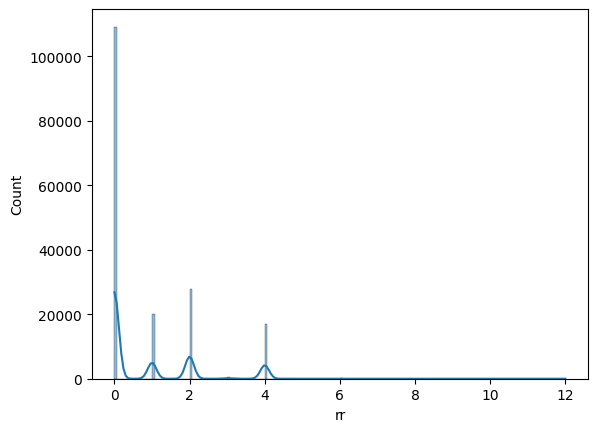


Column: A_frequency
count    175107.000000
mean          0.841794
std           1.297289
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          12.000000
Name: A_frequency, dtype: float64


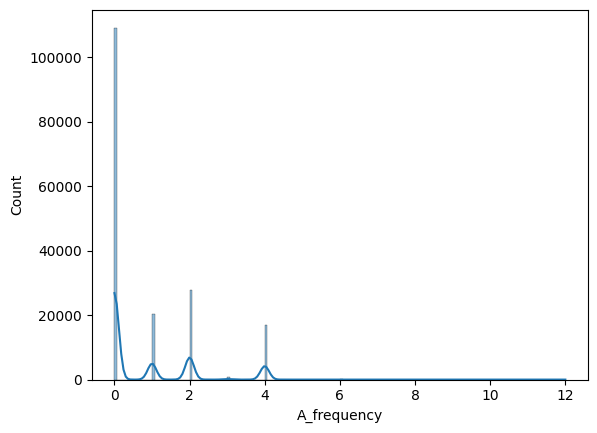


Column: PTR_frequency
count    175107.000000
mean          2.111366
std           2.513660
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          18.000000
Name: PTR_frequency, dtype: float64


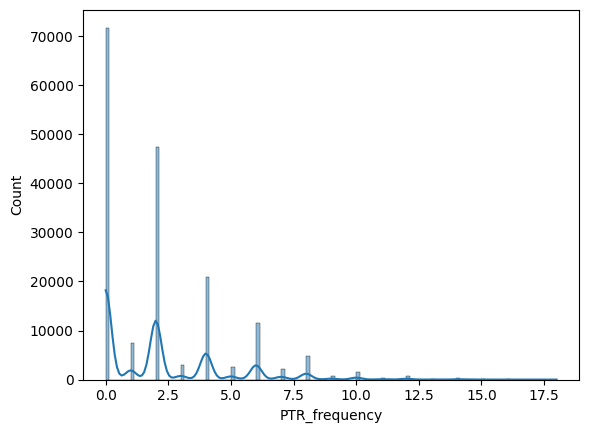


Column: TXT_frequency
count    175107.000000
mean          0.000023
std           0.004779
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TXT_frequency, dtype: float64


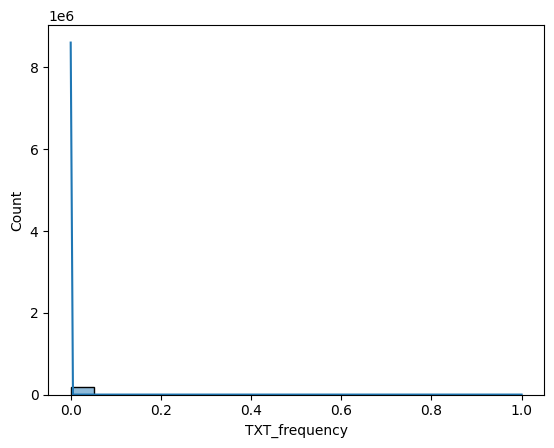


Column: AAAA_frequency
count    175107.000000
mean          0.000011
std           0.004779
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: AAAA_frequency, dtype: float64


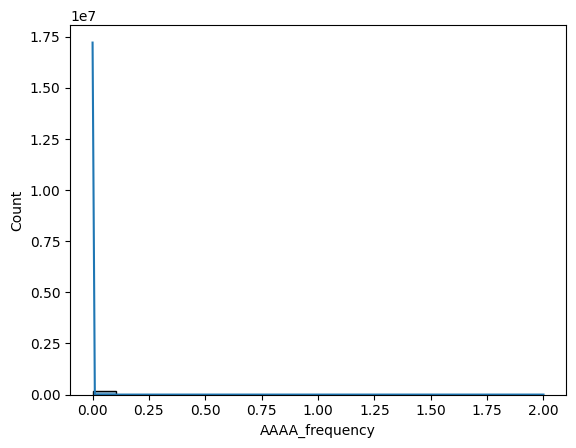


Column: rr_count
count    175107.000000
mean          0.329810
std           0.661498
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: rr_count, dtype: float64


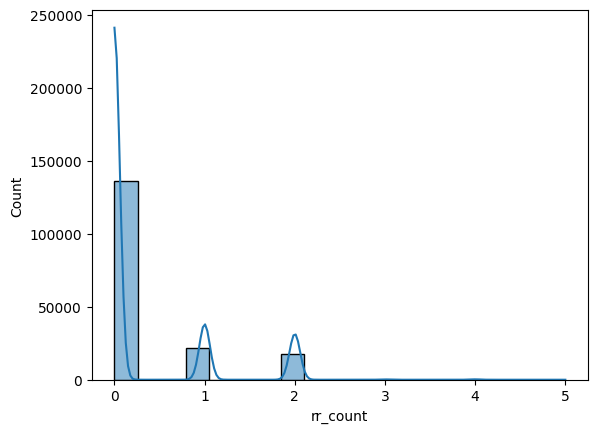


Column: rr_name_entropy
count    175107.000000
mean          2.949152
std           0.367208
min           0.693120
25%           2.693240
50%           3.102731
75%           3.222243
max           3.570534
Name: rr_name_entropy, dtype: float64


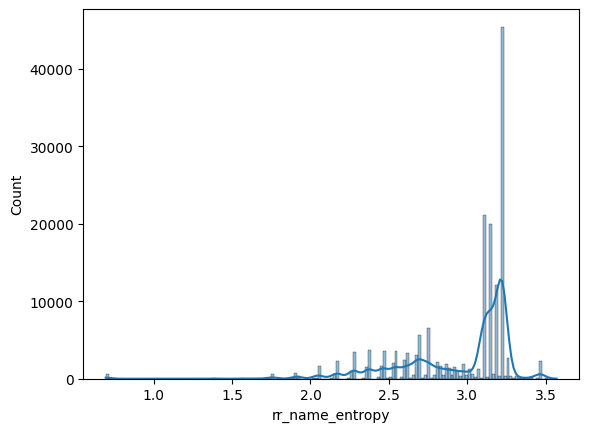


Column: rr_name_length
count    175107.000000
mean         21.381418
std           6.417082
min           2.000000
25%          15.000000
50%          24.000000
75%          27.000000
max          36.000000
Name: rr_name_length, dtype: float64


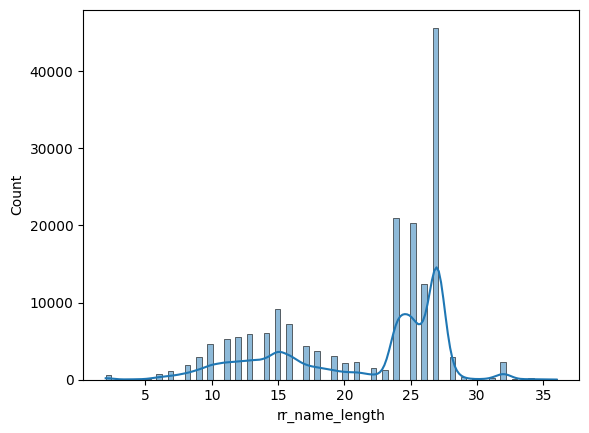


Column: distinct_ns
count    175107.000000
mean          0.212818
std           0.416343
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: distinct_ns, dtype: float64


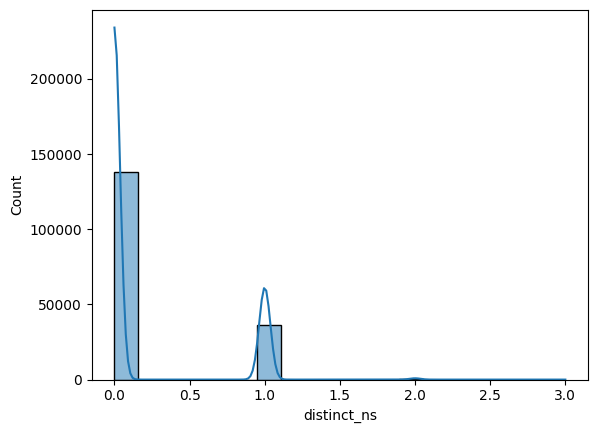


Column: ttl_mean
count    175107.000000
mean         53.964386
std          66.439445
min           1.000000
25%           1.000000
50%           1.000000
75%         125.000000
max         255.000000
Name: ttl_mean, dtype: float64


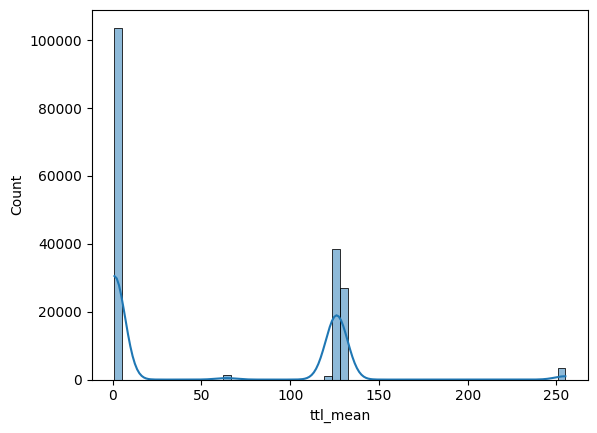


Column: ttl_variance
count    175107.000000
mean          1.984312
std           4.425665
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1003.102051
Name: ttl_variance, dtype: float64


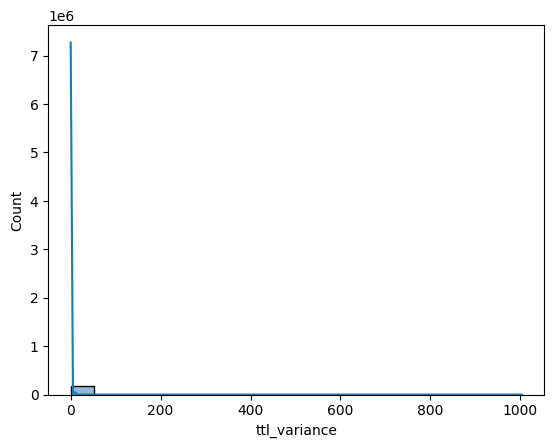

In [31]:
# To know if we put 0, mean or drop the columns we need to see the distribution
import matplotlib.pyplot as plt
import seaborn as sns

for col in missing_counts[missing_counts > 0].index:
    print(f"\nColumn: {col}")
    print(df_all[col].describe())
    sns.histplot(df_all[col].dropna(), kde=True)
    plt.show()


In [32]:
# we can distinguish 2 type :
# the one with lot of 0 already so we can still put 0 without issue :
count_cols = ['rr', 'A_frequency', 'PTR_frequency', 'TXT_frequency',
              'AAAA_frequency', 'rr_count', 'distinct_ns']
df_all[count_cols] = df_all[count_cols].fillna(0)

In [33]:
# the one without 0 already and need maybe more different things
# first : rr_name_entropy
# due to the current distribution we will use the median

df_all['rr_name_entropy'] = df_all['rr_name_entropy'].fillna(0)


In [34]:
## rr_name_length
# same !
df_all['rr_name_length'] = df_all['rr_name_length'].fillna(0)


In [35]:
##ttl_mean
# also
df_all['ttl_mean'] = df_all['ttl_mean'].fillna(df_all['ttl_mean'].median())


In [36]:
#ttl_variance
#we can deduce if it's missing that mean he has no variance
df_all['ttl_variance'] = df_all['ttl_variance'].fillna(0)


In [37]:
# let do a end check of the missings values, things like that
df_all.dtypes
df_all.isna().sum().sort_values(ascending=False)


rr                  0
A_frequency         0
PTR_frequency       0
TXT_frequency       0
AAAA_frequency      0
rr_type             0
rr_count            0
rr_name_entropy     0
rr_name_length      0
distinct_ns         0
unique_country      0
unique_asn          0
unique_ttl          0
ttl_mean            0
ttl_variance        0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels_max          0
labels_average      0
longest_word        0
len                 0
subdomain           0
GlobalClass         0
dtype: int64

In [38]:
#No void values anymore  we can continue the preprocessing and the start of the project


# After the Pre-Preprocessing (Missing and bad writed values) ( Feature engennieiring / post Processing)



In [39]:
# Now we have correct value we need to transform / encod the value (object) into readable values
df_all.dtypes

rr                  float32
A_frequency         float32
PTR_frequency       float32
TXT_frequency       float32
AAAA_frequency      float32
rr_type              object
rr_count            float32
rr_name_entropy     float32
rr_name_length      float32
distinct_ns         float32
unique_country       object
unique_asn           object
unique_ttl           object
ttl_mean            float32
ttl_variance        float32
FQDN_count             int8
subdomain_length       int8
upper                  int8
lower                  int8
numeric                int8
entropy             float32
special                int8
labels_max             int8
labels_average      float32
longest_word          int32
len                    int8
subdomain              int8
GlobalClass          object
dtype: object

In [40]:
# we have 4 values to encode : rr_type, unique_country, , unique_asn , unique_ttl , the Globalclass need to be kept like that as it will be our label

In [41]:
# Encode rr_type as numbers, keep it in the same column
print(df_all['rr_type'].value_counts()) # before
df_all['rr_type'] = pd.factorize(df_all['rr_type'])[0]

# Check result

# after
print(df_all['rr_type'].value_counts())


rr_type
{None}           366814
{'PTR'}          103337
{'A'}             65982
{'TXT'}               4
{'AAAA', 'A'}         1
Name: count, dtype: int64
rr_type
1    366814
0    103337
2     65982
3         4
4         1
Name: count, dtype: int64


In [42]:
# unique_country,
print(df_all['unique_country'].value_counts())

unique_country
{}              499448
{'US'}           18672
{'JP'}            3209
{'DE'}            2629
{'RU'}            1492
                 ...  
{'ZM'}               1
{'BM'}               1
{'DO'}               1
{'US', 'DE'}         1
{'RU', 'KZ'}         1
Name: count, Length: 138, dtype: int64


In [43]:
#  as we can see some have many country so we will keep the first one
def clean_country_keep_first(item):
    if isinstance(item, str):
        item = item.strip('{}').replace("'", "")
        countries = [c.strip() for c in item.split(',') if c.strip()]
        return countries[0] if countries else 'none'
    else:
        return 'none'

df_all['unique_country'] = df_all['unique_country'].apply(clean_country_keep_first)
print(df_all['unique_country'].value_counts())


unique_country
none    499453
US       18673
JP        3209
DE        2629
RU        1493
         ...  
KH           1
ZM           1
IS           1
BM           1
DO           1
Name: count, Length: 134, dtype: int64


In [44]:
#for later is better to encode them :
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_all['unique_country_encoded'] = le.fit_transform(df_all['unique_country'])
print(df_all['unique_country_encoded'].value_counts())
df_all.drop(columns=['unique_country'], inplace=True)

unique_country_encoded
133    499453
124     18673
61       3209
31       2629
105      1493
        ...  
64          1
131         1
58          1
14          1
33          1
Name: count, Length: 134, dtype: int64


In [45]:
#we have yet : unique_asn ,
print(df_all['unique_asn'].value_counts())
#it's going to be the same as country just we have only 1 values each time here

unique_asn
{}              499448
{'AS13335'}       6688
{'AS15169'}       1574
{'AS16509'}       1552
{'AS24940'}       1302
                 ...  
{'AS22645'}          1
{'AS209181'}         1
{'AS27630'}          1
{'AS33660'}          1
{'AS22703'}          1
Name: count, Length: 3326, dtype: int64


In [46]:

# Encode unique_asn
le_asn = LabelEncoder()
df_all['unique_asn_encoded'] = le_asn.fit_transform(df_all['unique_asn'])

# Optional: drop original column
df_all.drop(columns=['unique_asn'], inplace=True)


In [47]:
# for unique_ttl
print(df_all['unique_ttl'].value_counts())


unique_ttl
[]            361031
[1]           103712
[128, 122]     38569
[128]          27123
[255]           3324
[64]            1464
[122]            914
[64, 128]          1
Name: count, dtype: int64


In [48]:
import ast  # to safely parse string lists

def ttl_set_to_mean(ttl_str):
    # Handle empty strings or sets
    if ttl_str in ('{}', '', '[]', None):
        return 0.0
    try:
        # Convert string representation of list to actual Python list
        ttl_list = ast.literal_eval(ttl_str)
        # Ensure all values are numeric
        ttl_list = [float(x) for x in ttl_list]
        # Keep only unique values
        unique_values = list(set(ttl_list))
        # Compute mean
        return float(sum(unique_values) / len(unique_values))
    except Exception as e:
        # If something unexpected happens, return 0
        return 0.0

# Apply function
df_all['unique_ttl_mean'] = df_all['unique_ttl'].apply(ttl_set_to_mean)

# Drop the original column
df_all.drop(columns=['unique_ttl'], inplace=True)

# Convert to float32
df_all['unique_ttl_mean'] = df_all['unique_ttl_mean'].astype('float32')


In [49]:
print(df_all['unique_ttl_mean'].value_counts())
df_all['unique_ttl_mean'] = df_all['unique_ttl_mean'].astype('float32')


unique_ttl_mean
0.0      361031
1.0      103712
125.0     38569
128.0     27123
255.0      3324
64.0       1464
122.0       914
96.0          1
Name: count, dtype: int64


In [50]:
#now lets check the types
df_all.dtypes


rr                        float32
A_frequency               float32
PTR_frequency             float32
TXT_frequency             float32
AAAA_frequency            float32
rr_type                     int64
rr_count                  float32
rr_name_entropy           float32
rr_name_length            float32
distinct_ns               float32
ttl_mean                  float32
ttl_variance              float32
FQDN_count                   int8
subdomain_length             int8
upper                        int8
lower                        int8
numeric                      int8
entropy                   float32
special                      int8
labels_max                   int8
labels_average            float32
longest_word                int32
len                          int8
subdomain                    int8
GlobalClass                object
unique_country_encoded      int64
unique_asn_encoded          int64
unique_ttl_mean           float32
dtype: object

In [51]:
# We have only 1 object left  all the other are float, int64 or int 8
# then let convert everything as float
# Select all numeric columns except the label
numeric_cols = df_all.select_dtypes(include=['int8', 'int32', 'int64', 'float64']).columns

# Convert them to float32
df_all[numeric_cols] = df_all[numeric_cols].astype('float32')

# Verify types
print(df_all.dtypes)


rr                        float32
A_frequency               float32
PTR_frequency             float32
TXT_frequency             float32
AAAA_frequency            float32
rr_type                   float32
rr_count                  float32
rr_name_entropy           float32
rr_name_length            float32
distinct_ns               float32
ttl_mean                  float32
ttl_variance              float32
FQDN_count                float32
subdomain_length          float32
upper                     float32
lower                     float32
numeric                   float32
entropy                   float32
special                   float32
labels_max                float32
labels_average            float32
longest_word              float32
len                       float32
subdomain                 float32
GlobalClass                object
unique_country_encoded    float32
unique_asn_encoded        float32
unique_ttl_mean           float32
dtype: object


In [52]:
# We can truely start now as we have all the preprocessing and feature engenieering done

In [53]:
df_all['GlobalClass'] = df_all['GlobalClass'].astype(str)


## Preprocessing done


## Second analysis
We can now do a second analysis after the preprocessing

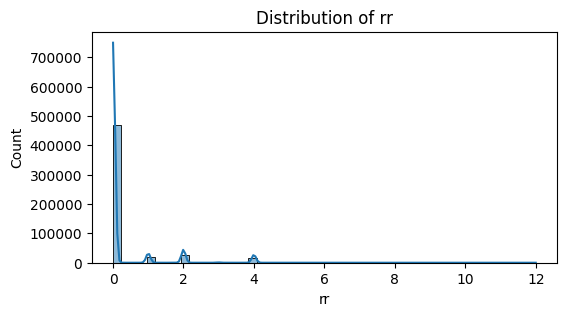

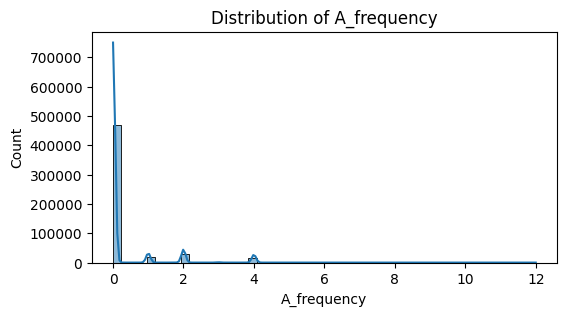

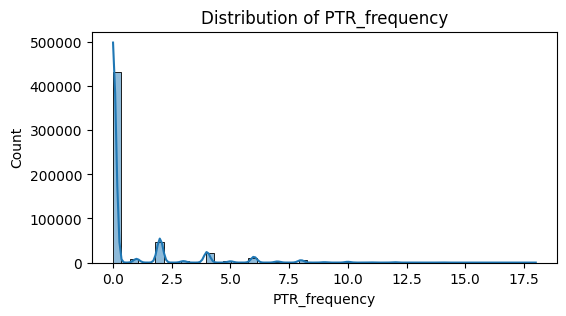

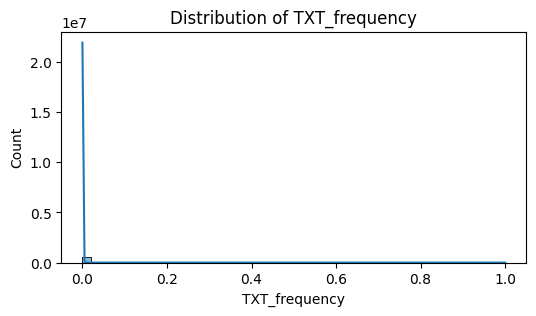

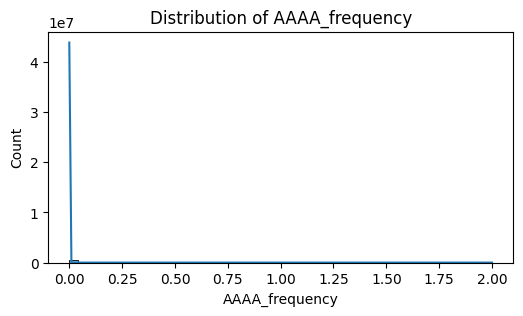

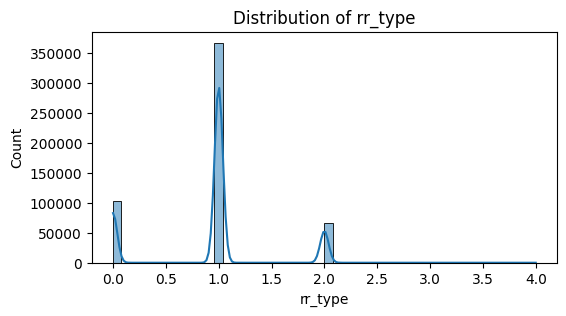

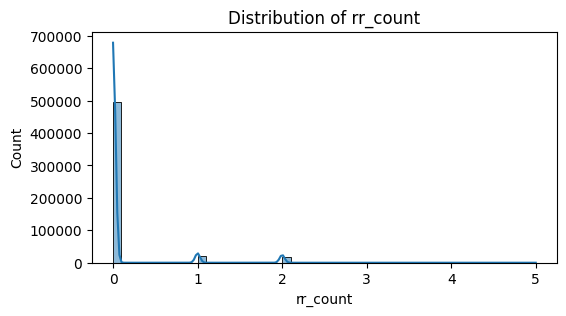

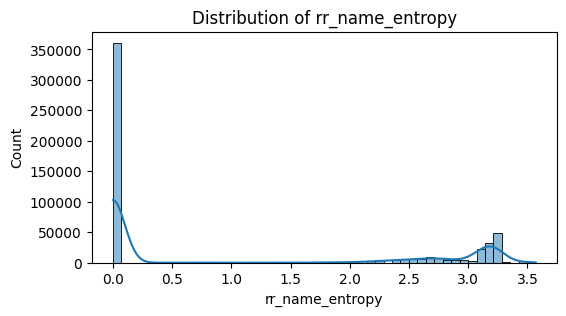

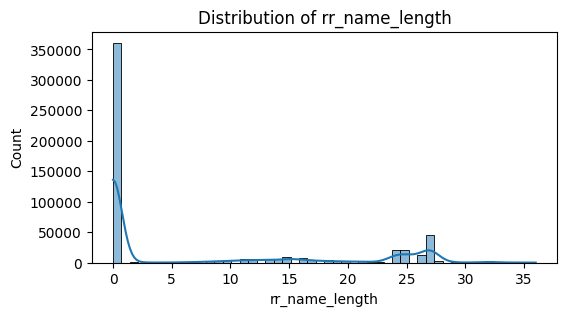

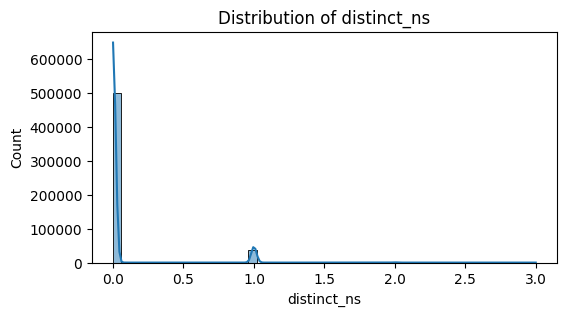

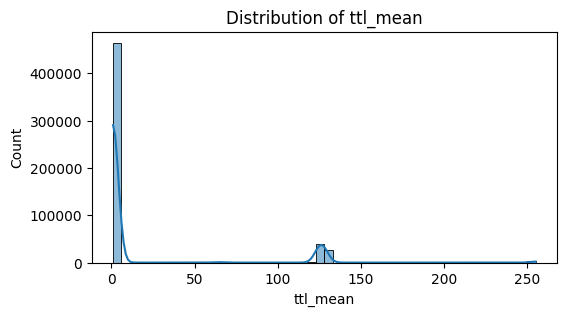

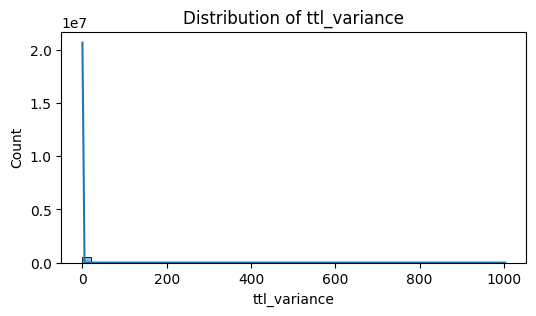

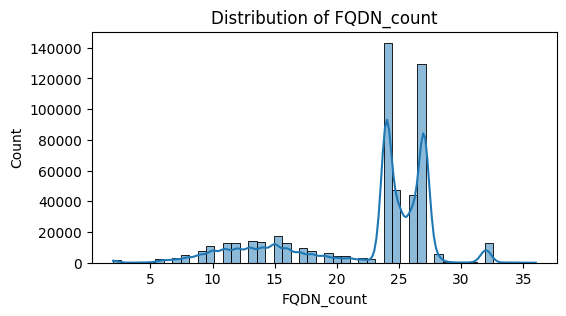

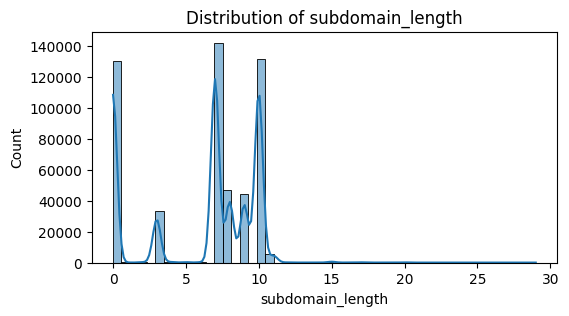

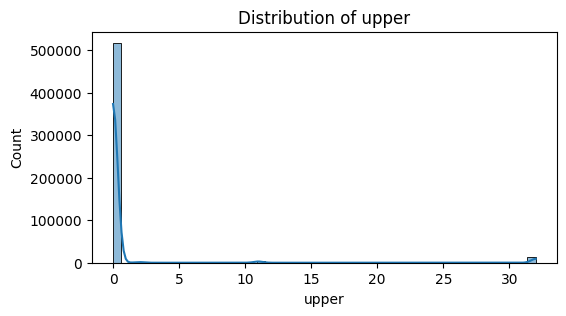

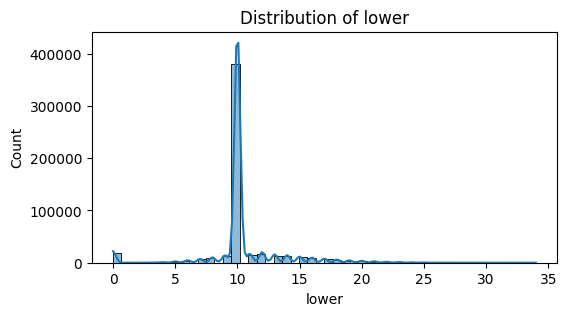

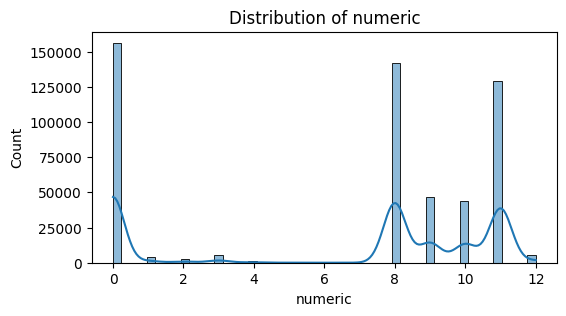

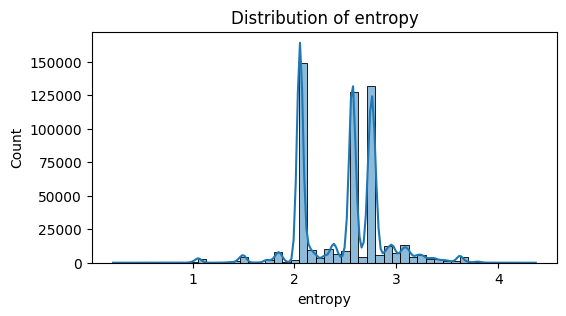

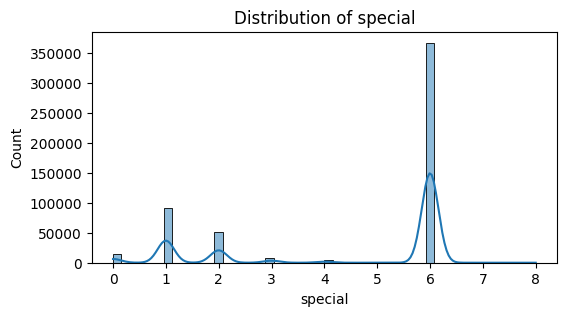

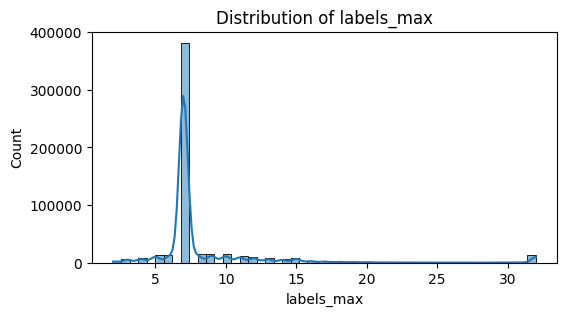

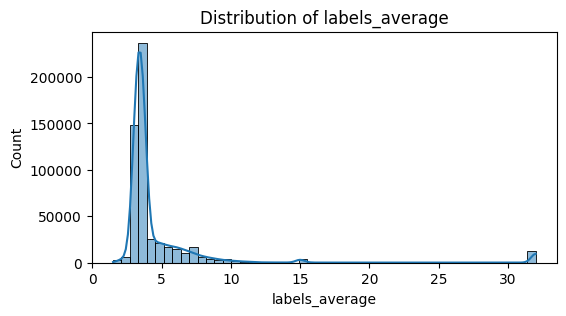

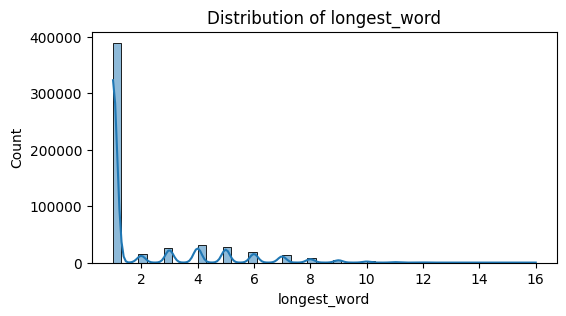

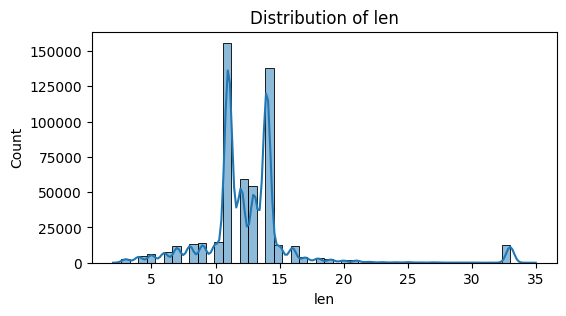

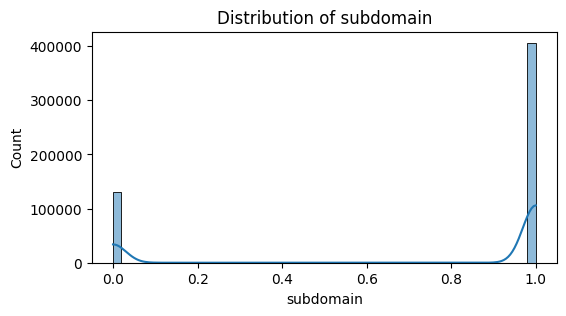

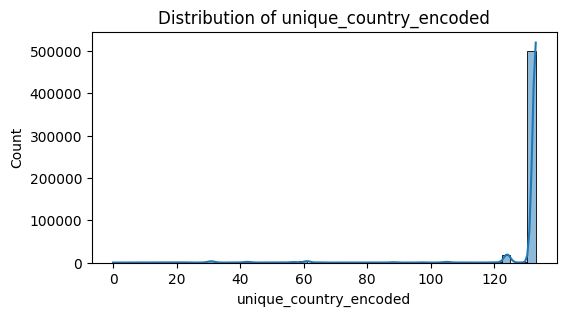

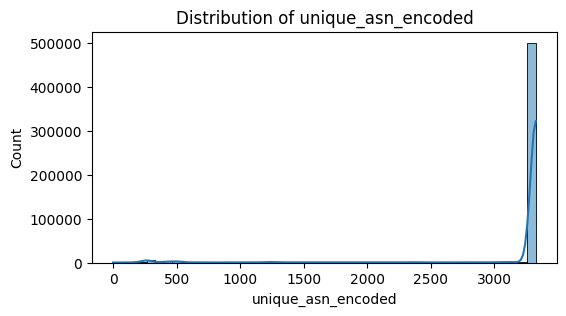

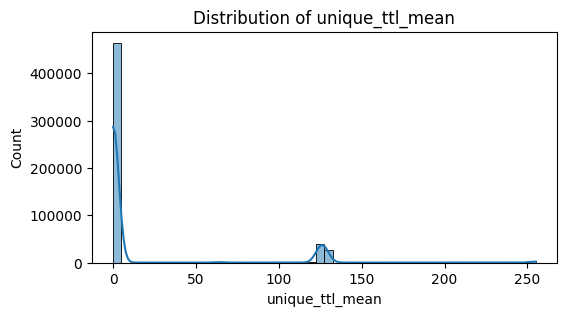

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_all.select_dtypes(include='float32').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_all[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


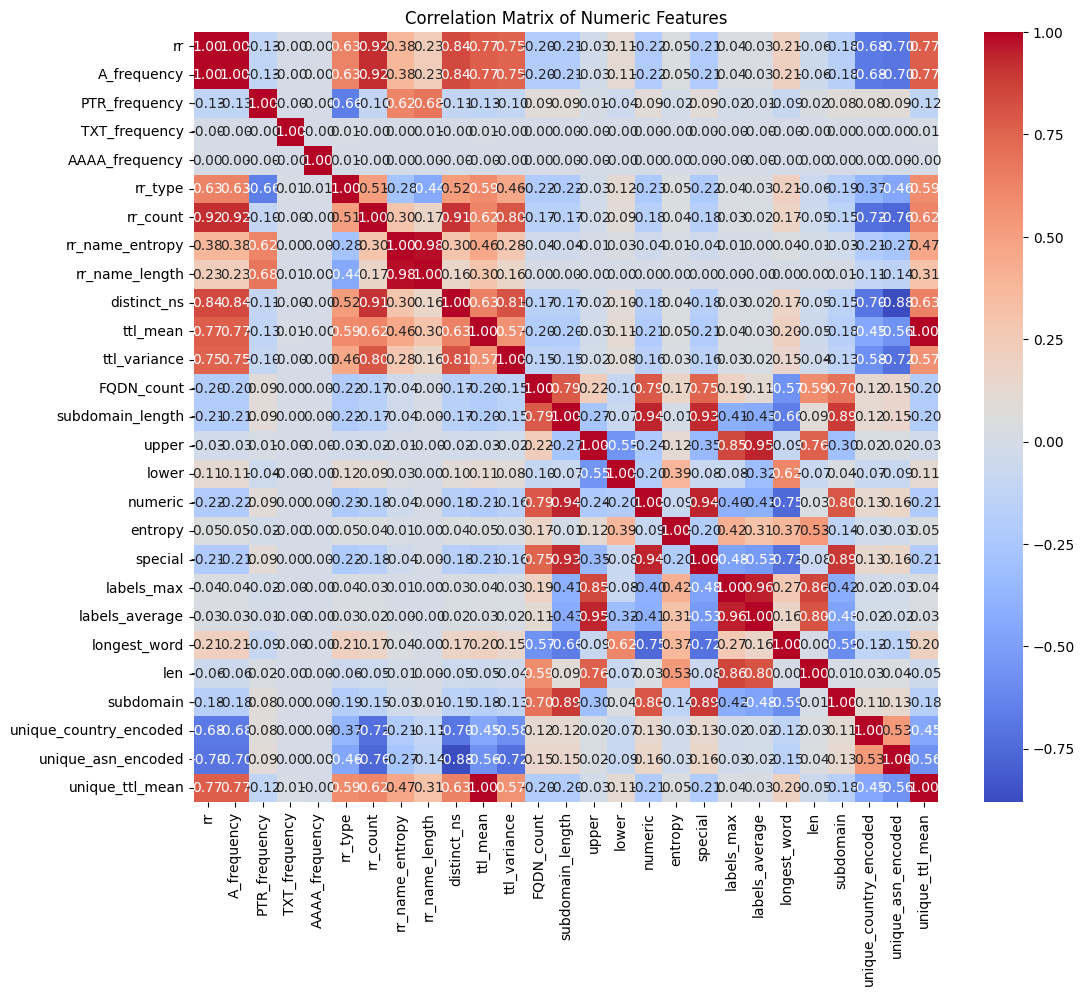

In [55]:
# Select only numeric columns
numeric_cols = df_all.select_dtypes(include=['float32']).columns

# Compute correlation matrix
corr_matrix = df_all[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()
# the Correlatiom matrix is lot better no more "object" , but we still have lot of feature wo are not correled at all so we need to see if we keep them

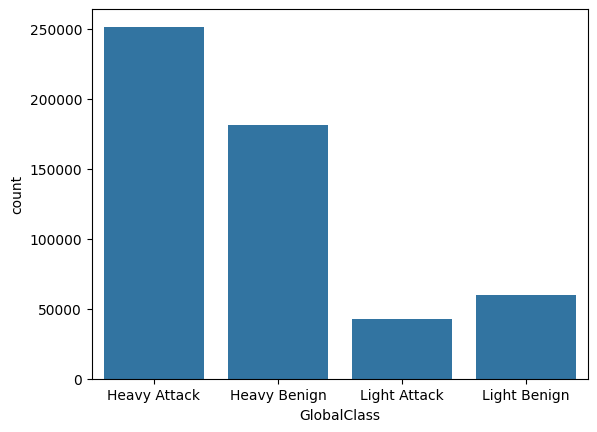

GlobalClass
Heavy Attack    251670
Heavy Benign    181694
Light Benign     60091
Light Attack     42683
Name: count, dtype: int64
GlobalClass
Heavy Attack    46.941273
Heavy Benign    33.889409
Light Benign    11.208122
Light Attack     7.961197
Name: count, dtype: float64


In [56]:
#It's interesting as some feature have strong correlation but other not that much so it's nice then
# the Correlatiom matrix is lot better no more "object" , but we still have lot of feature wo are not correled at all so we need to see if we keep them
df_all['GlobalClass'].value_counts(normalize=True)
sns.countplot(x='GlobalClass', data=df_all)
plt.show()
class_counts = df_all['GlobalClass'].value_counts()
print(class_counts)
class_percentage = class_counts / class_counts.sum() * 100
print(class_percentage)

we have a bit of an imbalance, the Heavy Attack and the Benign are representing a big part

# 3. Formalisation of the problem.




For the formalisation of the problem, first we have tought if we needed to fuse all the class or if we keep them split between heavy and light, we think it's good to keep it like that as the light attack can in some cases be ignored as it don't impact much but if we fuse everything and we try to do some classification regression and we find it's an "attack" and don't have any precision on the type for decision maker, they can't be able to know what is the amount of thing to do,

So our goal here will be based on the dataset provided we will try to predict if it's a Benign or an attack and the weight of the DNS request " Heavy, Light".




By training an learning machine algorithm on this subject we will be able to test with new DNS data gathered in realt time and predict the best we can, and be able to guide decision maker about the choice or doing a dynamic firewall / cache system who can filter the attack and the Benign request

In [57]:
# doing the following code was my first tought but at the end i have removed directly the fact that we used at all the file about the benign as it was doing more 
# harm than good to keep it in the Df_all dataset so i remove at all the benign file trace 
# df_all = df_all[df_all['GlobalClass'] != 'Benign'].copy()

# print("Updated Class distribution:\n", df_all['GlobalClass'].value_counts())

# This distribution is a lot better more balanced 290k for attack vs 240k for Benign which is good because we have lot of information to be able to train our data well

# 4. Selection of a baseline model and implementation of the model.
(As we didn't understood the assignement saying (Submited individualy and as i have done the first 3 part alone with a little help of DIadié in the preprocessing but all the commantary and writing is done by me before alone ))

We wil lstart with the Naive Bayes classification, as we have lot of feature it can be a good baseline model for that

In [58]:
# we are going to work on the Naive Bayes model as we have a lot of features and it can be a good baseline model for that
# First we need to split the data into X & Y
from sklearn.model_selection import train_test_split
X = df_all.drop(columns=['GlobalClass'])
y = df_all['GlobalClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())
# Im going to do the model and the training :
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training set shape: (428910, 27)
Test set shape: (107228, 27)
Training class distribution:
 GlobalClass
Heavy Attack    201336
Heavy Benign    145355
Light Benign     48073
Light Attack     34146
Name: count, dtype: int64
Test class distribution:
 GlobalClass
Heavy Attack    50334
Heavy Benign    36339
Light Benign    12018
Light Attack     8537
Name: count, dtype: int64
Confusion Matrix:
 [[  255  1861 48214     4]
 [  149 19076 11400  5714]
 [   72   267  8198     0]
 [   62  6332  3703  1921]]

Classification Report:
               precision    recall  f1-score   support

Heavy Attack       0.47      0.01      0.01     50334
Heavy Benign       0.69      0.52      0.60     36339
Light Attack       0.11      0.96      0.20      8537
Light Benign       0.25      0.16      0.20     12018

    accuracy                           0.27    107228
   macro avg       0.38      0.41      0.25    107228
weighted avg       0.49      0.27      0.25    107228



In [59]:
# The accuracy is not that good only 64% between each class and for exemple the f1 score for the Hight Attack is the lowest 0.01, so less than 1% 

# We can try to use SMOTE or other techniques to balance the dataset and improve the
# model performance.
# But as a baseline model is very bad
# we need to improve it later with more advanced model balancing technique, hyperparameter tuning etc 
# but i think the most important thing is about the choice of the variable as we have a lot of variable that are not correled or correled strangely together if we clean them and 
# take only the relevant par we are going to be more efficient
# We can see that the model is not performing well on the minority classes then let try a little imbalance on this one 
# We will try to use SMOTe as we have learn in the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Resampled training set shape:", X_train_resampled.shape)
print("Resampled training class distribution:\n", y_train_resampled.value_counts())


Resampled training set shape: (805344, 27)
Resampled training class distribution:
 GlobalClass
Light Attack    201336
Heavy Attack    201336
Heavy Benign    201336
Light Benign    201336
Name: count, dtype: int64


In [60]:
# Now the resemlpling is done by the SMOT let try to retrain the model naive bayes
model = GaussianNB()
model.fit(X_train_resampled, y_train_resampled)
# Let see the results
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 2776  1901 45653     4]
 [  962 18964 10565  5848]
 [  441   274  7822     0]
 [  326  6306  3427  1959]]

Classification Report:
               precision    recall  f1-score   support

Heavy Attack       0.62      0.06      0.10     50334
Heavy Benign       0.69      0.52      0.59     36339
Light Attack       0.12      0.92      0.21      8537
Light Benign       0.25      0.16      0.20     12018

    accuracy                           0.29    107228
   macro avg       0.42      0.41      0.27    107228
weighted avg       0.56      0.29      0.29    107228



In [61]:
# Unexpedly the results are the same than before with the SMOTE so maybe it's not the good way do handle this imabalance in that case 
# Even if overall the model is more balanced between each class the F1 score is a bit better for the heavy attack it's still not good, and the heavy benign went down a lot  
# then it reduced inequality between each class but the performance are worst overall
# THen maybe the naive bayes is not the best model for that we can try with other model like random forest on it we will go on deeper model later 
# lets try with a new model, the good part is as we have truely a lot of row and feature later when we are going into more advanced model
# and more feature choose we will be able to have a good model a fiable one due to the number of data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Let see the results
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[50237    48    38    11]
 [10764 23019     8  2548]
 [ 8518     5    14     0]
 [ 3455  7676     0   887]]

Classification Report:
               precision    recall  f1-score   support

Heavy Attack       0.69      1.00      0.81     50334
Heavy Benign       0.75      0.63      0.69     36339
Light Attack       0.23      0.00      0.00      8537
Light Benign       0.26      0.07      0.11     12018

    accuracy                           0.69    107228
   macro avg       0.48      0.43      0.40    107228
weighted avg       0.62      0.69      0.63    107228



In [62]:
# In that case it's better for the Heavy attack and Benign heavy, but the light attack and light Benign are even more worst than before
# it's a special case when we see that the accuracy is not that much relevant, as for exemple here the F1-score of light attack is 0 
# so it never catched this classes lets try an other imablancing technique than SMOTE to fight this imbalance thing and lets try it again on the random forest
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
print("Resampled training set shape:", X_train_resampled.shape)
print("Resampled training class distribution:\n", y_train_resampled.value_counts())

# Now the resemlpling is done by the RandomUnderSampler let try to retrain the model random forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
# Let see the results

Resampled training set shape: (136584, 27)
Resampled training class distribution:
 GlobalClass
Heavy Attack    34146
Heavy Benign    34146
Light Attack    34146
Light Benign    34146
Name: count, dtype: int64


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
# We loost a lot of lines but we hope the esults are going to be better 
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# it's the same issue as before with the SMOTE just here it's faster with the random undersampler but the results are similar
# The result is performing a lot lot better on the minority class ( 20, 30 % f1-score) but the majority class is worst than before 
# we drop to 33 % for heavy attack and 50% for benign heavy 



Confusion Matrix:
 [[10636    71 39563    64]
 [ 1201 13386  9578 12174]
 [ 1508     8  7017     4]
 [  382  3844  3073  4719]]

Classification Report:
               precision    recall  f1-score   support

Heavy Attack       0.77      0.21      0.33     50334
Heavy Benign       0.77      0.37      0.50     36339
Light Attack       0.12      0.82      0.21      8537
Light Benign       0.28      0.39      0.33     12018

    accuracy                           0.33    107228
   macro avg       0.49      0.45      0.34    107228
weighted avg       0.67      0.33      0.38    107228



# Conclusion of the lab 5



To conclude this lab before the next part we can see that the dataset was big and very complicated lot of feature and i have done a lot of preprocessing to be able to use this dataset correctly 
Even with all the preprocessing done the result on the models are not that good between 30 -60% accuracy but with issue due to the imbalance it's the issue with the fact that we have kept the 4 classes rather than only 2 (attack or benign)
During the next labs we are going to go deeper into the choice of the feature and truely check which one are relevant or not maybe see with a PCA or similiar to see whcih one impact the most and remove all the "Noise" cause as we have see during the HeatMatrix (Correlation)
we have some feature like some frequency TXt or AAAA who are alone and not any correlation to nothing, the correlation matrix is peculiar too as we can distinguish truely 2 side for the feature but it was explain in the website there is too main category the stateless and the statefull things 

# LAB 6 PART 2 


In [64]:
"""
LAB 6 PART 2
In this step of your project, you will
• apply grid search to establish the optimal configuration of your baseline models.
• include this step in your final proposal.
• apply ensemble models: Voting Bagging or Stacking
• include discussion of the different evaluations in your final report. So take a time to finalize your figures
and your visualizations.
"""



'\nLAB 6 PART 2\nIn this step of your project, you will\n• apply grid search to establish the optimal configuration of your baseline models.\n• include this step in your final proposal.\n• apply ensemble models: Voting Bagging or Stacking\n• include discussion of the different evaluations in your final report. So take a time to finalize your figures\nand your visualizations.\n'

In [65]:
# lets apply the Grid search to find the optimal configuration of the baseline models i choose that mean GaussienNB & RFC

from sklearn.model_selection import GridSearchCV
# Define parameter grid for RandomForestClassifier
param_grid_rfc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,10],
    'min_samples_split': [2, 5]
}
rfc = RandomForestClassifier(random_state=42)
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc,
                               scoring='f1_macro', cv=3, n_jobs=-1, verbose=2) # verbose good to see the progression of the grid search and the time 
grid_search_rfc.fit(X_train, y_train)
print("Best parameters for RandomForestClassifier:", grid_search_rfc.best_params_)
best_rfc = grid_search_rfc.best_estimator_
y_pred_rfc = best_rfc.predict(X_test)
print("RandomForestClassifier Classification Report:\n", classification_report(y_test, y_pred_rfc))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=  45.6s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=  49.4s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time= 1.1min
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time= 1.1min
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time= 1.2min
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time= 1.2min
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time= 1.2min
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time= 1.2min
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=  45.2s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=5; total time=  48.6s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=5; total time=  44.0s
[CV] END ..criterion=gini, max_depth=10, min_samp

In [66]:
# As we know the basic parameter for the RandomForestClassifier are :
# {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
# we can see that the default parameter are the best ones for that model in that case so the time spend with the grid search was not 
# worth it it didn't change anything concerning the results as the f1 score for light attack is still 0

In [67]:

# Define parameter grid for GaussianNB
param_grid_gnb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07],
    
} # it will be fast for GaussianNB as there are only 1 parameter as the var_smoothing
gnb = GaussianNB()
grid_search_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb,
                               scoring='f1_macro', cv=3, n_jobs=-1, verbose=2) # the verbose is usefull to see the progression of the grid search
grid_search_gnb.fit(X_train, y_train)
print("Best parameters for GaussianNB:", grid_search_gnb.best_params_)
best_gnb = grid_search_gnb.best_estimator_
y_pred_gnb = best_gnb.predict(X_test)
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred_gnb))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ................................var_smoothing=1e-09; total time=   1.6s
[CV] END ................................var_smoothing=1e-07; total time=   1.6s
[CV] END ................................var_smoothing=1e-09; total time=   1.7s
[CV] END ................................var_smoothing=1e-09; total time=   1.7s
[CV] END ................................var_smoothing=1e-07; total time=   1.7s
[CV] END ................................var_smoothing=1e-08; total time=   1.7s
[CV] END ................................var_smoothing=1e-08; total time=   1.8s
[CV] END ................................var_smoothing=1e-08; total time=   1.8s
[CV] END ................................var_smoothing=1e-07; total time=   0.7s
Best parameters for GaussianNB: {'var_smoothing': 1e-07}
GaussianNB Classification Report:
               precision    recall  f1-score   support

Heavy Attack       0.68      0.90      0.78     50334
Heavy Benig

In [68]:
# now for the GaussianNB the best parameter found is :
# {'var_smoothing': 1e-07} and the default parameter is 1e-09
# and for the Accuracy and F1 score it's a lot better than before 
# as before the classification report was with the basic gaussianNB with default parameter :
"""
Heavy Attack       0.47      0.01      0.01     50334
Heavy Benign       0.69      0.52      0.60     36339
Light Attack       0.11      0.96      0.20      8537
Light Benign       0.25      0.16      0.20     12018

    accuracy                           0.27    107228
   macro avg       0.38      0.41      0.25    107228
weighted avg       0.49      0.27      0.25    107228
"""
# and now it's a lot better in many aspect the accuracy, and the F1 score of Havy attack and overall accuracy but the F1 score for the light attack drop down a bit /2
# still better than the current f1 score of 0 of the RandomForestClassifier

'\nHeavy Attack       0.47      0.01      0.01     50334\nHeavy Benign       0.69      0.52      0.60     36339\nLight Attack       0.11      0.96      0.20      8537\nLight Benign       0.25      0.16      0.20     12018\n\n    accuracy                           0.27    107228\n   macro avg       0.38      0.41      0.25    107228\nweighted avg       0.49      0.27      0.25    107228\n'

In [69]:
# After we will try to use bagging and voting classifier (soft (for average of voting probability) to see if we can improve the results even more
# after that we will show some visualizations, and we will need to do a big decision concerning the choice of all the feature to choose only maybe the more relevant to improve our accuracy
# and we will use the best model found so far with that data

# so lets try the voting classifier with soft voting
from sklearn.ensemble import VotingClassifier
# Create the base models with the best parameters found
best_rfc = RandomForestClassifier(random_state=42, criterion='gini', max_depth=None, min_samples_split=2)
best_gnb = GaussianNB(var_smoothing=1e-07)
# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rfc', best_rfc), ('gnb', best_gnb)],
    voting='soft'  # Use 'soft' voting to average probabilities
)
# Train the Voting Classifier
voting_clf.fit(X_train, y_train)
# Make predictions
y_pred_voting = voting_clf.predict(X_test)
# Evaluate the model
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))


Voting Classifier Classification Report:
               precision    recall  f1-score   support

Heavy Attack       0.69      0.93      0.79     50334
Heavy Benign       0.71      0.65      0.68     36339
Light Attack       0.12      0.03      0.05      8537
Light Benign       0.28      0.07      0.11     12018

    accuracy                           0.67    107228
   macro avg       0.45      0.42      0.41    107228
weighted avg       0.60      0.67      0.62    107228



In [70]:
# unfortunately the results are not that better than other model we have found so far...
# We can try with bagging classifier now
from sklearn.ensemble import BaggingClassifier
# Create the base model with the best parameters found
best_rfc = RandomForestClassifier(random_state=42, criterion='gini', max_depth=None, min_samples_split=2)
# Create the Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=best_rfc,
    n_estimators=10,
    random_state=42
)
# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)
# Make predictions
y_pred_bagging = bagging_clf.predict(X_test)
# Evaluate the model
print("Bagging Classifier Classification Report:\n", classification_report(y_test, y_pred_bagging)) 

Bagging Classifier Classification Report:
               precision    recall  f1-score   support

Heavy Attack       0.69      1.00      0.81     50334
Heavy Benign       0.75      0.65      0.70     36339
Light Attack       0.31      0.00      0.00      8537
Light Benign       0.25      0.05      0.09     12018

    accuracy                           0.70    107228
   macro avg       0.50      0.43      0.40    107228
weighted avg       0.63      0.70      0.63    107228



In [71]:
# Take a very long time for a result a bit better but only for the Accuracy not at all for the f1-score so not that wort it 

In [72]:
# same for GuassianNB with bagging
# Create the base model with the best parameters found
best_gnb = GaussianNB(var_smoothing=1e-07)
# Create the Bagging Classifier
bagging_clf_gnb = BaggingClassifier(
    estimator=best_gnb,
    n_estimators=10,
    random_state=42
)
# Train the Bagging Classifier
bagging_clf_gnb.fit(X_train, y_train)
# Make predictions
y_pred_bagging_gnb = bagging_clf_gnb.predict(X_test)
# Evaluate the model
print("Bagging Classifier GaussianNB Classification Report:\n", classification_report(y_test, y_pred_bagging_gnb))

Bagging Classifier GaussianNB Classification Report:
               precision    recall  f1-score   support

Heavy Attack       0.68      0.93      0.79     50334
Heavy Benign       0.70      0.63      0.66     36339
Light Attack       0.12      0.03      0.05      8537
Light Benign       0.26      0.07      0.11     12018

    accuracy                           0.66    107228
   macro avg       0.44      0.42      0.40    107228
weighted avg       0.60      0.66      0.61    107228



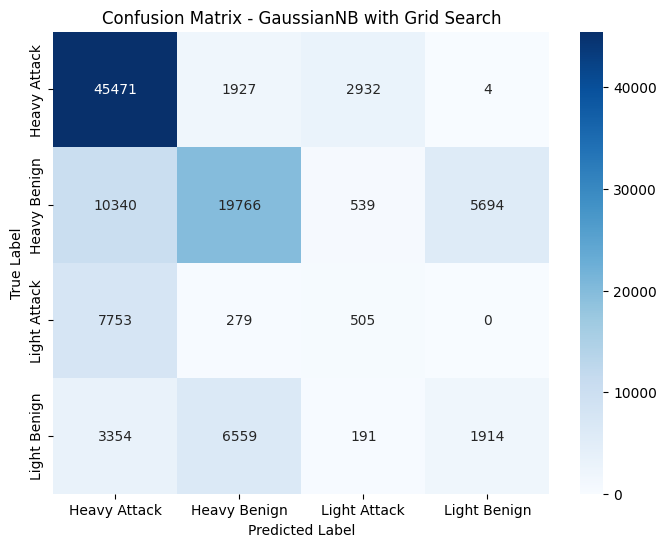

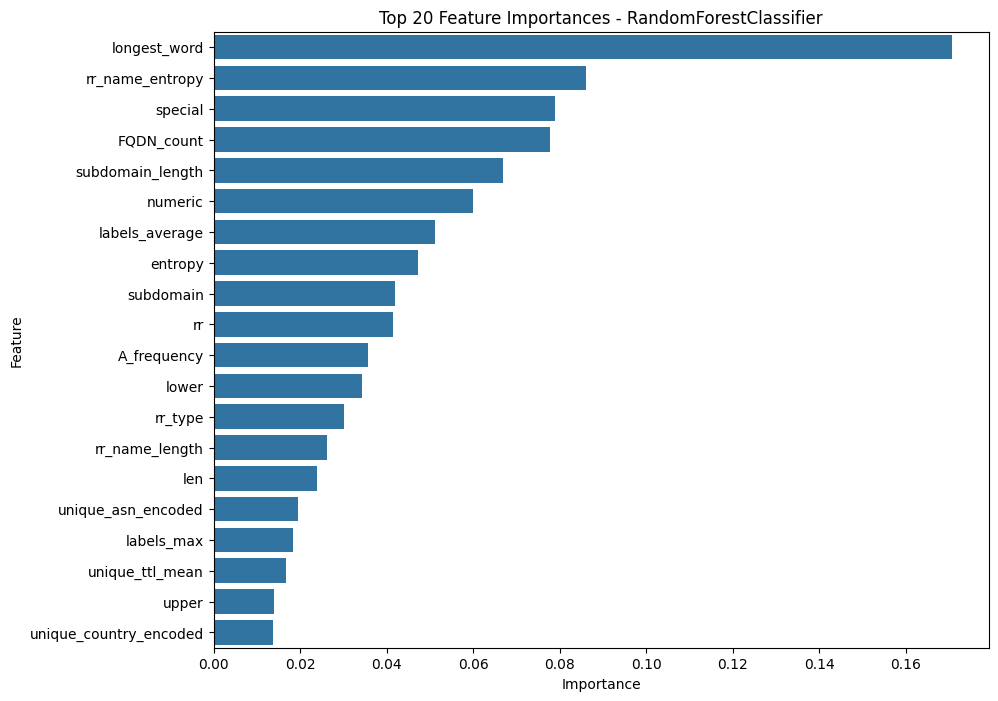

In [ ]:
# it's worst than the normal GaussianNB without bagging for the F1 score at least 
# so lets see the vizualisation result to finish this part and after we will choose the best features 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix for the best model (GaussianNB with Grid Search)
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))

# Determine labels safely: prefer the estimator returned by GridSearchCV if available and fitted,
# otherwise fallback to best_gnb.classes_ if it exists, or finally to unique labels in y_test.
if 'grid_search_gnb' in globals() and hasattr(grid_search_gnb, 'best_estimator_'):
    gnb_model_for_labels = grid_search_gnb.best_estimator_
else:
    gnb_model_for_labels = globals().get('best_gnb', None)

labels = None
if gnb_model_for_labels is not None and hasattr(gnb_model_for_labels, 'classes_'):
    labels = gnb_model_for_labels.classes_
else:
    labels = np.unique(y_test)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - GaussianNB with Grid Search')
plt.show()


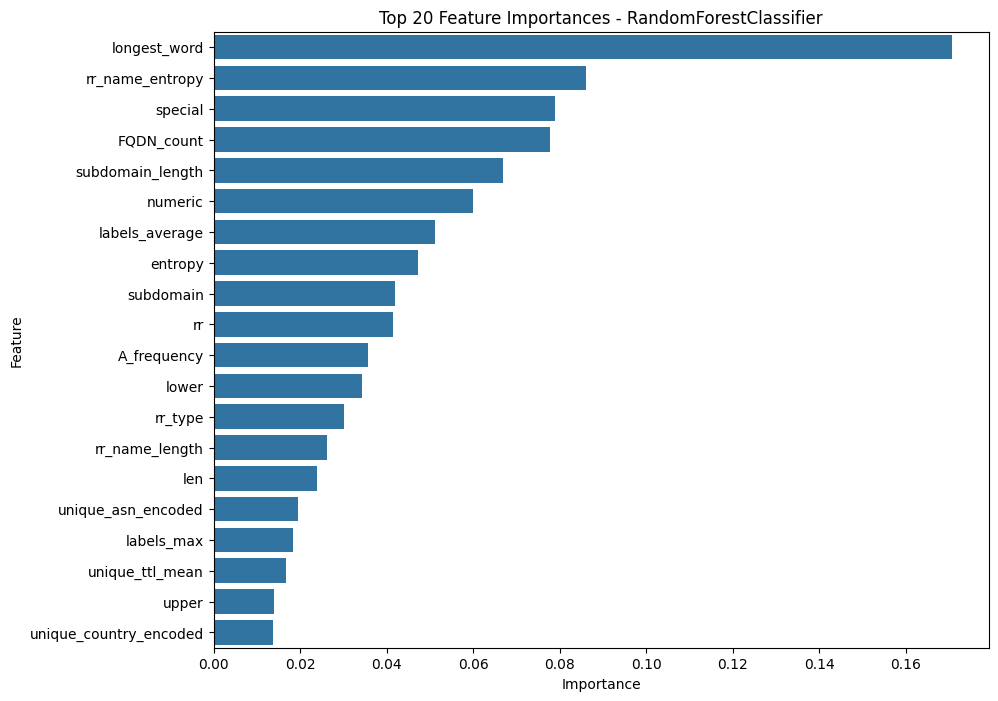

In [76]:

# Feature Importance for RandomForestClassifier
rfc_candidate = None
if 'grid_search_rfc' in globals() and hasattr(grid_search_rfc, 'best_estimator_'):
    rfc_candidate = grid_search_rfc.best_estimator_
elif 'best_rfc' in globals():
    rfc_candidate = globals().get('best_rfc')
elif 'model' in globals():
    rfc_candidate = globals().get('model')

feat_importances = None
if rfc_candidate is not None and hasattr(rfc_candidate, 'feature_importances_'):
    feat_importances = rfc_candidate.feature_importances_
elif rfc_candidate is not None and hasattr(rfc_candidate, 'fit') and hasattr(rfc_candidate, 'predict'):
    # try to use the model fitted on training data if it's the same object (best effort)
    try:
        # if the candidate is fitted it will have feature_importances_
        feat_importances = getattr(rfc_candidate, 'feature_importances_', None)
    except Exception:
        feat_importances = None

if feat_importances is None:
    print("RandomForest feature importances not available (model may be unfitted). Skipping feature importance plot.")
else:
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feat_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title('Top 20 Feature Importances - RandomForestClassifier')
    plt.show()


Resampled training set shape: (805344, 27)
Resampled training class distribution:
 GlobalClass
Light Attack    201336
Heavy Attack    201336
Heavy Benign    201336
Light Benign    201336
Name: count, dtype: int64
Confusion Matrix:
 [[ 1777  1927 46626     4]
 [  305 19677 10524  5833]
 [  279   279  7979     0]
 [  114  6536  3413  1955]]

Classification Report:
               precision    recall  f1-score   support

Heavy Attack       0.72      0.04      0.07     50334
Heavy Benign       0.69      0.54      0.61     36339
Light Attack       0.12      0.93      0.21      8537
Light Benign       0.25      0.16      0.20     12018

    accuracy                           0.29    107228
   macro avg       0.44      0.42      0.27    107228
weighted avg       0.61      0.29      0.28    107228



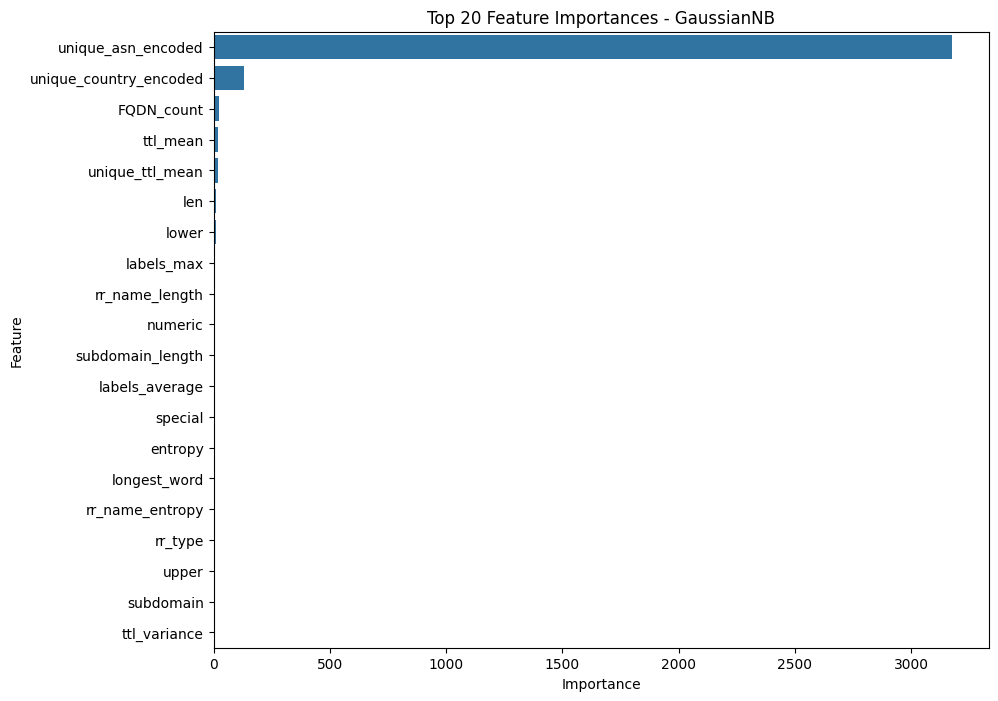

Top 10 features: ['unique_asn_encoded', 'unique_country_encoded', 'FQDN_count', 'ttl_mean', 'unique_ttl_mean', 'len', 'lower', 'labels_max', 'rr_name_length', 'numeric']


In [80]:
# lets try to use the precedent imbalance thing model with the best parameter found and after we will keep the 10 best feature and we will retry to train the model again to see if it's changed 
# we will use gaussianNB
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Resampled training set shape:", X_train_resampled.shape)
print("Resampled training class distribution:\n", y_train_resampled.value_counts())
# Now the resemlpling is done by the SMOT let try to retrain the model naive bayes with the best parameter found
best_gnb = GaussianNB(var_smoothing=1e-07)
best_gnb.fit(X_train_resampled, y_train_resampled)
# Let see the results
y_pred = best_gnb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# lets the the most significant feature and will retrain the model with only these feature to see if it's better
# Get feature importances from GaussianNB (using absolute mean of each feature per class as a proxy)
class_means = best_gnb.theta_
feature_importances_gnb = np.abs(class_means).mean(axis=0)
feature_names = X_train.columns
feature_importance_df_gnb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_gnb})
feature_importance_df_gnb = feature_importance_df_gnb.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gnb.head(20))
plt.title('Top 20 Feature Importances - GaussianNB')
plt.show()# Select top 10 features
top_10_features = feature_importance_df_gnb['Feature'].head(10).tolist()
print("Top 10 features:", top_10_features)  

Top 20 features (excluding the most dominant one): ['FQDN_count', 'ttl_mean', 'unique_ttl_mean', 'len', 'lower', 'labels_max', 'rr_name_length', 'numeric', 'subdomain_length', 'labels_average', 'special', 'entropy', 'longest_word', 'rr_name_entropy', 'rr_type', 'upper', 'subdomain', 'ttl_variance', 'PTR_frequency', 'rr']


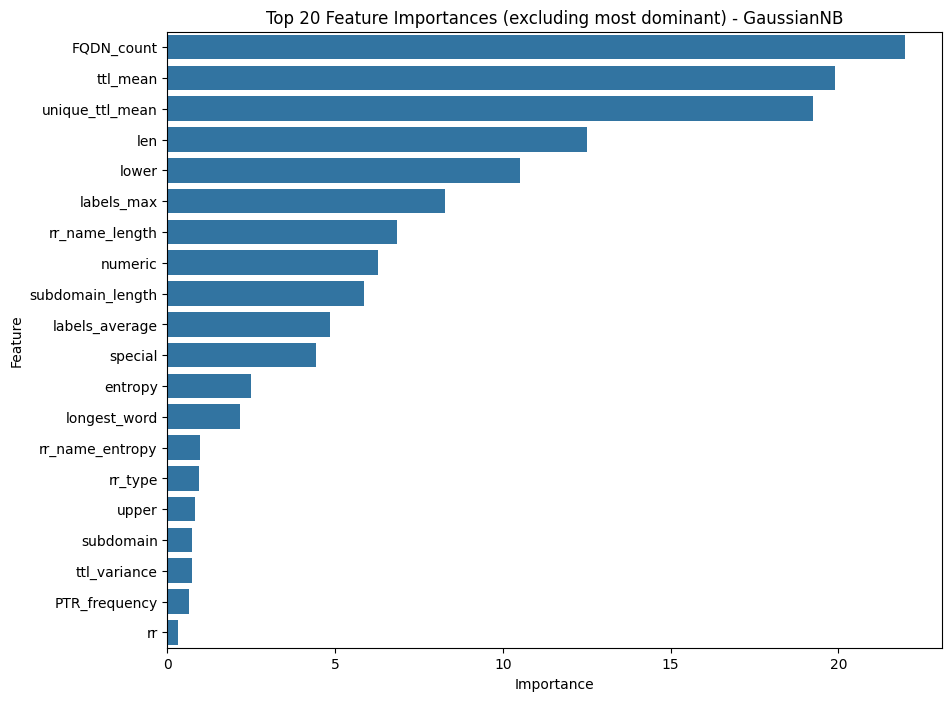

In [89]:
# as we saw the important of the first feature is too much we will delete it and take the 10 others
top_20_features = feature_importance_df_gnb['Feature'].head(22).tolist()[2:]
print("Top 20 features (excluding the most dominant one):", top_20_features) 
# let show the barplot of importance without the first one
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gnb.head(22).iloc[2:])
plt.title('Top 20 Feature Importances (excluding most dominant) - GaussianNB')
plt.show()

In [90]:
# lets retrain the model with only these feature
X_train_top20 = X_train_resampled[top_20_features]
X_test_top20 = X_test[top_20_features]
best_gnb_top20 = GaussianNB(var_smoothing=1e-07)
best_gnb_top20.fit(X_train_top20, y_train_resampled)
# Let see the results
y_pred_top20 = best_gnb_top20.predict(X_test_top20)
print("Confusion Matrix with Top 20 Features:\n", confusion_matrix(y_test, y_pred_top20))
print("\nClassification Report with Top 20 Features:\n", classification_report(y_test, y_pred_top20))

Confusion Matrix with Top 20 Features:
 [[10380  2068 37881     5]
 [ 1090 18239  9314  7696]
 [ 1572   300  6665     0]
 [  357  6020  2990  2651]]

Classification Report with Top 20 Features:
               precision    recall  f1-score   support

Heavy Attack       0.77      0.21      0.33     50334
Heavy Benign       0.68      0.50      0.58     36339
Light Attack       0.12      0.78      0.20      8537
Light Benign       0.26      0.22      0.24     12018

    accuracy                           0.35    107228
   macro avg       0.46      0.43      0.34    107228
weighted avg       0.63      0.35      0.39    107228



In [91]:
# it's a lot smoother now the f1-score are more balanced between each class even if the accuracy drop down a lot 
# but we still strulggle a lot to have a good thing, lets try with the random forest with the top 20 feature
X_train_top20 = X_train_resampled[top_20_features]
X_test_top20 = X_test[top_20_features]
best_rfc_top20 = RandomForestClassifier(random_state=42, criterion='gini', max_depth=None, min_samples_split=2)
best_rfc_top20.fit(X_train_top20, y_train_resampled)
# Let see the results
y_pred_rfc_top20 = best_rfc_top20.predict(X_test_top20)
print("Confusion Matrix with Top 20 Features - RandomForest:\n", confusion_matrix(y_test, y_pred_rfc_top20))
print("\nClassification Report with Top 20 Features - RandomForest:\n", classification_report(y_test, y_pred_rfc_top20))

Confusion Matrix with Top 20 Features - RandomForest:
 [[12126    44 38139    25]
 [ 1387 17749  9386  7817]
 [ 1771     8  6756     2]
 [  448  5527  3008  3035]]

Classification Report with Top 20 Features - RandomForest:
               precision    recall  f1-score   support

Heavy Attack       0.77      0.24      0.37     50334
Heavy Benign       0.76      0.49      0.59     36339
Light Attack       0.12      0.79      0.21      8537
Light Benign       0.28      0.25      0.27     12018

    accuracy                           0.37    107228
   macro avg       0.48      0.44      0.36    107228
weighted avg       0.66      0.37      0.42    107228



In [1]:
# To conclude this part of the LAB 6 we need to truely use a better model and the use of SMOTE or only some feature don't do much about the 
# accuracy and the performance of the model 

In [ ]:
# then in the next steps we will need to use lot better models 
# combining with maybe smote or other technique to fight imablance and maybe 
# more feature enginering before but we have done some and it's not that relevant for now 
